# Movie Studio Insights Project
![](./images/pexels-cottonbro-6883796.jpg)

## Contents

1. [Overview](#overview)
2. [Business problem](#1-business-problem)
3. [Goal](#goal)
4. [Stakeholders](#stakeholders)
5. [Data understanding](#data-understanding)
   - [Data sources](#data-sources)
   - [Data import](#data-import)
6. [Data preparation](#data-preparation)  
   - [Data cleaning](#data-cleaning)  
   - [Feature engineering](#feature-engineering)  
7. [Exploratory analysis](#5-exploratory-analysis)  
   - [Return on investment (ROI)](#return-on-investment-roi)   
   - [Studio performance](#studio-performance)  
   - [Popularity and rating analysis](#popularity-and-rating-analysis)  
   - [Actors and directors](#actors-and-directors)
   - [Sequel vs Original movies](#sequel-vs-original-movies)
   - [Niche movies](#niche-movies)  
8. [Key findings](#key-findings)  
9.  [Recommendations](#recommendations)
10. [Conclusion](#conclusion)
11. [Next steps](#next-steps)

## Overview

In today’s entertainment landscape, original video content has become a critical driver of success for major companies. With streaming platforms and traditional studios investing heavily in film production, the market is more competitive than ever. This company has decided to enter this space by launching a new movie studio but lacks the internal knowledge and historical data to make informed decisions about what types of films to produce.

This project provides data-driven insights to support the strategic launch of a new movie studio. The analysis of historical movie performance data across genres, financial returns, talent partnerships, release timing, and audience reception, helps identify key trends and opportunities in the competitive entertainment industry.

The insights generated from this project aim to guide decision-making in content selection, budget allocation, marketing strategy, and franchise development.

## Business problem
![](./images/pexels-brunomassao-2335049.jpg)

With the entertainment industry increasingly dominated by companies producing original content, this company aims to enter the space by launching a new movie studio. However, as a newcomer, it lacks historical insight into what types of films are most likely to succeed both critically and financially. As the data analyst on this project, I am tasked with conducting exploratory data analysis (EDA) to uncover patterns, trends, and correlations in movie performance data. I will then translate those findings into actionable business insights that the head of the new movie studio can use to guide strategic decisions around:
- Genre selection
- Release timing
- Talent acquisition (directors, actors)
- Budget allocation
- Franchise opportunities (sequels)
- Audience targeting (MPAA ratings)

## Goal

The primary objective is to uncover meaningful trends and patterns in film performance, including genre popularity, audience ratings, financial returns, and seasonal influences, to help the new studio make strategic content decisions. The goal is to build a strong foundation for selecting and developing film projects that balance artistic value with commercial potential, ultimately maximizing return on investment, audience engagement, and long-term brand credibility in a highly competitive industry.

## Stakeholders

Several key groups will rely on the insights generated from this analysis to guide the studio’s operations and strategic direction. Studio executives and producers will use the findings to evaluate and approve film projects while minimizing financial risk. Marketing and distribution teams will apply the data to design more effective promotional strategies and optimize release schedules for broader audience reach. Creative leaders, including directors and writers, will benefit from understanding which genres and themes have a stronger likelihood of success, allowing them to align their creative efforts with market demand. Investors and shareholders will look to the analysis to assess the viability of the studio’s business model and its long-term growth prospects.

## Data understanding

Before performing any analysis, it's important to understand the datasets being used, where they come from, and what insights they can provide. This project draws from multiple sources, each offering a different perspective on the movie industry from financial performance to audience ratings and creative talent.

### Data sources

This project draws on data from multiple external platforms and databases to provide a comprehensive view of the movie industry. Each dataset contributes unique insights into different aspects of film performance, audience reception, financial returns, and creative talent. They were cleaned, merged, and analyzed to generate actionable insights for decision-makers launching a new movie studio.

### Data import

This section covers the libraries used for data analysis and visualization, as well as the datasets imported from various sources.

#### Librairies

In [465]:
#standard data science libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

#statistical modeling and tests
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency, ttest_ind

#remove warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

In [466]:
#disable scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#format string output to avoid truncation
pd.set_option('display.max_colwidth', None)

#### Datasets

##### The Numbers (TN)
The The Numbers (TN) dataset is one of the most important sources in this analysis, as it provides financial insights into movie production and performance. It allows us to understand how much money was spent on making a film how much it earned, and ultimately, how successful it was from a financial standpoint.

In [467]:
tn_budgets_df = pd.read_csv('tn.movie_budgets.csv.gz')
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


###### Dataset overview

In [468]:
#display basic info
print("=== Dataset shape ===")
print(f"{tn_budgets_df.shape[0]} rows, {tn_budgets_df.shape[1]} columns\n")

=== Dataset shape ===
5782 rows, 6 columns



In [469]:
#create and display a summary DataFrame
tn_budgets_summary = pd.DataFrame({
    'Data type': tn_budgets_df.dtypes,
    'Missing values': tn_budgets_df.isnull().sum()
})

print("================= Summary =================")
print(tn_budgets_summary)

================= Summary =================
                  Data type  Missing values
id                    int64               0
release_date         object               0
movie                object               0
production_budget    object               0
domestic_gross       object               0
worldwide_gross      object               0


In [470]:
#clean currency fields
def clean_currency(col):
    return col.str.replace('[,$]', '', regex=True).astype(int)

tn_budgets_df['production_budget'] = clean_currency(tn_budgets_df['production_budget'])
tn_budgets_df['domestic_gross'] = clean_currency(tn_budgets_df['domestic_gross'])
tn_budgets_df['worldwide_gross'] = clean_currency(tn_budgets_df['worldwide_gross'])

#convert release_date to datetime
tn_budgets_df['release_date'] = pd.to_datetime(tn_budgets_df['release_date'])

##### Box Office Mojo (BOM)
`bom.movie_gross.csv.gz` contains financial performance data for movies, including domestic and foreign gross revenue broken down by studio. It provides insight into which studios earn the most at the box office and how well individual films perform globally. This dataset is key for analyzing market share, studio dominance, and regional revenue distribution.

In [471]:
bom_df = pd.read_csv('bom.movie_gross.csv.gz')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


###### Dataset overview

In [472]:
print("=== Dataset shape ===")
print(f"{bom_df.shape[0]} rows, {bom_df.shape[1]} columns\n")

=== Dataset shape ===
3387 rows, 5 columns



In [473]:
bom_summary = pd.DataFrame({
    'Data type': bom_df.dtypes,
    'Missing values': bom_df.isnull().sum(),
    'Missing (%)': ((bom_df.isnull().sum() / len(bom_df)) * 100).round(2).astype(str) + ' %'
})

print("====================== Summary ======================")
print(bom_summary)

====================== Summary ======================
               Data type  Missing values Missing (%)
title             object               0       0.0 %
studio            object               5      0.15 %
domestic_gross   float64              28      0.83 %
foreign_gross     object            1350     39.86 %
year               int64               0       0.0 %


In [474]:
#clean and convert to numeric
bom_df['domestic_gross'] = bom_df['domestic_gross'].astype(str).replace('[,$]', '', regex=True).astype(float)
bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna('0').str.replace('[,$]', '', regex=True).astype(float)

##### TMDB (The Movie Database)
`tmdb.movies.csv.gz` contains information about movies from The Movie Database, including details like movie titles, release years, popularity scores, and vote counts. It provides a useful view of a movie’s popularity and audience engagement, which can be used to analyze trends in viewer preferences and correlate with financial performance metrics like box office revenue.

In [475]:
tmdb_df = pd.read_csv('tmdb.movies.csv.gz')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186


###### Dataset overview

In [476]:
print("========= Basic info =========")
print(f"Shape: {tmdb_df.shape[0]} rows, {tmdb_df.shape[1]} columns")


========= Basic info =========
Shape: 26517 rows, 10 columns


In [477]:
tmdb_summary = pd.DataFrame({
    'Data Type': tmdb_df.dtypes,
    'Missing Values': tmdb_df.isnull().sum()
})

print("===================== Summary =====================")
print(tmdb_summary)

===================== Summary =====================
                  Data Type  Missing Values
Unnamed: 0            int64               0
genre_ids            object               0
id                    int64               0
original_language    object               0
original_title       object               0
popularity          float64               0
release_date         object               0
title                object               0
vote_average        float64               0
vote_count            int64               0


In [478]:
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date']).dt.date

In [479]:
#statistics
print("=========================== Statistics ===========================")
print(tmdb_df.describe())

print("\n=== Release Date Range ===")
print(f"Min: {tmdb_df['release_date'].min()}")
print(f"Max: {tmdb_df['release_date'].max()}")

=========================== Statistics ===========================
       Unnamed: 0        id  popularity  vote_average  vote_count
count    26517.00  26517.00    26517.00      26517.00    26517.00
mean     13258.00 295050.15        3.13          5.99      194.22
std       7654.94 153661.62        4.36          1.85      960.96
min          0.00     27.00        0.60          0.00        1.00
25%       6629.00 157851.00        0.60          5.00        2.00
50%      13258.00 309581.00        1.37          6.00        5.00
75%      19887.00 419542.00        3.69          7.00       28.00
max      26516.00 608444.00       80.77         10.00    22186.00

=== Release Date Range ===
Min: 1930-04-29
Max: 2020-12-25


##### Rotten Tomatoes (RT)

The Rotten Tomatoes dataset includes information on movie reviews, ratings, and box office performance. It contains two main files: one with individual reviews (`rt.reviews.tsv.gz`) and another with movie-level details like MPAA ratings and earnings (`rt.movie_info.tsv.gz`). This data helps analyze how critical and audience reception influence a film’s financial success and provides insight into the relationship between ratings and revenue.

In [480]:
rt_reviews_df = pd.read_csv('rt.reviews.tsv.gz', sep='\t', encoding='latin1')
rt_reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,"A distinctly gallows take on contemporary financial mores, as one absurdly rich man's limo ride across town for a haircut functions as a state-of-the-nation discourse.",3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that never arrives...It's just old-fashioned bad storytelling.,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealings and digital communications and brief face-to-face conversations and sexual intermissions in a space shuttle of a limousine creeping through the gridlock of an anonymous New York City.,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"Continuing along a line introduced in last year's ""A Dangerous Method"", David Cronenberg pushes his cinema towards a talky abstraction in his uncanny, perversely funny and frighteningly insular adaptation of Don DeLillo, ""Cosmopolis"".",NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [481]:
rt_info_df = pd.read_csv('rt.movie_info.tsv.gz', sep='\t')
rt_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police drama earned five Academy Awards, including Best Picture, Best Adapted Screenplay (written by Ernest Tidyman), and Best Actor (Gene Hackman). Jimmy ""Popeye"" Doyle (Hackman) and his partner, Buddy Russo (Roy Scheider), are New York City police detectives on narcotics detail, trying to track down the source of heroin from Europe into the United States. Suave Alain Charnier (Fernando Rey) is the French drug kingpin who provides a large percentage of New York City's dope, and Pierre Nicoli (Marcel Bozzuffi) is a hired killer and Charnier's right-hand man. Acting on a hunch, Popeye and Buddy start tailing Sal Boca (Tony Lo Bianco) and his wife, Angie (Arlene Faber), who live pretty high for a couple whose corner store brings in about 7,000 dollars a year. It turns out Popeye's suspicions are right -- Sal and Angie are the New York agents for Charnier, who will be smuggling 32 million dollars' worth of heroin into the city in a car shipped over from France. The French Connection broke plenty of new ground for screen thrillers; Popeye Doyle was a highly unusual ""hero,"" an often violent, racist, and mean-spirited cop whose dedication to his job fell just short of dangerous obsession. The film's high point, a high-speed car chase with Popeye tailing an elevated train, was one of the most viscerally exciting screen moments of its day and set the stage for dozens of action sequences to follow. And the film's grimy realism (and downbeat ending) was a big change from the buff-and-shine gloss and good-guys-always-win heroics of most police dramas that preceded it. The French Connection was inspired by a true story, and Eddie Egan and Sonny Grosso, Popeye and Buddy's real life counterparts, both have small roles in the film. A sequel followed four years later.",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Packer, a 28 year-old finance golden boy dreaming of living in a civilization ahead of this one, watches a dark shadow cast over the firmament of the Wall Street galaxy, of which he is the uncontested king. As he is chauffeured across midtown Manhattan to get a haircut at his father's old barber, his anxious eyes are glued to the yuan's exchange rate: it is mounting against all expectations, destroying Eric's bet against it. Eric Packer is losing his empire with every tick of the clock. Meanwhile, an eruption of wild activity unfolds in the city's streets. Petrified as the threats of the real world infringe upon his cloud of virtual convictions, his paranoia intensifies during the course of his 24-hour cross-town odyssey. Packer starts to piece together clues that lead him to a most terrifying secret: his imminent assassination. -- (C) Official Site",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,"Illeana Douglas delivers a superb performance as Denise Waverly, a fictional singer and songwriter whose life bears more than a passing resemblance to that of real-life pop star Carole King. Edna Buxton, the daughter of a Philadelphia steel tycoon, aspires to a career as a singer, and when against her mother's bidding she sings a sultry version of ""Hey There (You With the Stars in Your Eyes)"" (instead of Mom's choice, ""You'll Never Walk Alone"") at a talent contest, she wins a recording contact and moves to New York City. She cuts a record and gains a new stage name, Denise Waverly; however, she soon finds that girl singers are a dime a dozen in the Big Apple and her career as a vocalist goes nowhere. But she has a knack for writing songs, and eccentric producer Joel Milner (John Turturro) asks her to pen some songs for his upcoming projects. Teamed with Howar

###### Dataset overview

1. `rt_reviews_df`

In [482]:
print("=== Dataset shape ===")
print(f"{rt_reviews_df.shape[0]} rows, {rt_reviews_df.shape[1]} columns\n")

=== Dataset shape ===
54432 rows, 8 columns



In [483]:
rt_reviews_summary = pd.DataFrame({
    'Data Type': rt_reviews_df.dtypes,
    'Missing Values': rt_reviews_df.isnull().sum(),
    '% Missing': (rt_reviews_df.isnull().sum() / len(rt_reviews_df) * 100).round(2).astype(str) + ' %'
})

print("=================== Summary ===================")
print(rt_reviews_summary)

=================== Summary ===================
           Data Type  Missing Values % Missing
id             int64               0     0.0 %
review        object            5563   10.22 %
rating        object           13517   24.83 %
fresh         object               0     0.0 %
critic        object            2722     5.0 %
top_critic     int64               0     0.0 %
publisher     object             309    0.57 %
date          object               0     0.0 %


In [484]:
#convert 'date' to datetime
rt_reviews_df['date'] = pd.to_datetime(rt_reviews_df['date'], errors='coerce').dt.date

In [485]:
print("======== Statistics ========")
print(rt_reviews_df.describe())

print("\n=== Date range ===")
print(f"Min: {tmdb_df['release_date'].min()}")
print(f"Max: {tmdb_df['release_date'].max()}")

======== Statistics ========
            id  top_critic
count 54432.00    54432.00
mean   1045.71        0.24
std     586.66        0.43
min       3.00        0.00
25%     542.00        0.00
50%    1083.00        0.00
75%    1541.00        0.00
max    2000.00        1.00

=== Date range ===
Min: 1930-04-29
Max: 2020-12-25


In [486]:
print("\n=== Distribution of reviews ===")
print(rt_reviews_df['fresh'].value_counts(dropna=False))


=== Distribution of reviews ===
fresh
fresh     33035
rotten    21397
Name: count, dtype: int64


2. `rt_info_df`

In [487]:
print("=== Dataset shape ===")
print(f"{rt_info_df.shape[0]} rows, {rt_info_df.shape[1]} columns\n")

=== Dataset shape ===
1560 rows, 12 columns



In [488]:
rt_info_summary = pd.DataFrame({
    'Data Type': rt_info_df.dtypes,
    'Missing Values': rt_info_df.isnull().sum(),
    '% Missing': (rt_info_df.isnull().sum() / len(rt_reviews_df) * 100).round(2).astype(str) + ' %'
})

print("==================== Summary ====================")
print(rt_info_summary)

==================== Summary ====================
             Data Type  Missing Values % Missing
id               int64               0     0.0 %
synopsis        object              62    0.11 %
rating          object               3    0.01 %
genre           object               8    0.01 %
director        object             199    0.37 %
writer          object             449    0.82 %
theater_date    object             359    0.66 %
dvd_date        object             359    0.66 %
currency        object            1220    2.24 %
box_office      object            1220    2.24 %
runtime         object              30    0.06 %
studio          object            1066    1.96 %


In [489]:
#Convert box_office to numeric
rt_info_df['box_office'] = rt_info_df['box_office'].str.replace('[,$]', '', regex=True).astype(float)
rt_info_df['theater_date'] = pd.to_datetime(rt_info_df['theater_date'], errors='coerce')
rt_info_df['dvd_date'] = pd.to_datetime(rt_info_df['dvd_date'], errors='coerce')

In [490]:
print("=== Unique MPAA ratings ===")
print(rt_info_df['rating'].value_counts(dropna=False))

=== Unique MPAA ratings ===
rating
R        521
NR       503
PG       240
PG-13    235
G         57
NaN        3
NC17       1
Name: count, dtype: int64


In [491]:
print("\n=== Box Office Range ===")
print(f"Min: ${rt_info_df['box_office'].min():,.2f}")
print(f"Max: ${rt_info_df['box_office'].max():,.2f}")


=== Box Office Range ===
Min: $363.00
Max: $368,000,000.00


##### IMDb 

`im.db` is a relational SQLite database containing detailed information about movies, including titles, genres, directors, actors, and ratings. It provides metadata that helps analyze the relationship between creative talent, movie categories, and audience reception. This dataset was used to extract insights such as top-performing directors and actors, genre trends, and niche but highly rated films.

In [492]:
#connect to the SQLite database
conn = sqlite3.connect('im.db')

###### Database overview

In [493]:
#query to get all table names
query_tables = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query_tables, conn)

#display table names
print("=== Tables in IMDb SQLite Database ===")
print(tables['name'])

=== Tables in IMDb SQLite Database ===
0     movie_basics
1        directors
2        known_for
3       movie_akas
4    movie_ratings
5          persons
6       principals
7          writers
Name: name, dtype: object


###### Entity Relationship Diagram (ERD)

![imdb_erd](./images/movie_data_erd.jpeg)

## Data preparation

Since we are working across multiple datasets, this section focuses on transforming raw datasets into clean, structured, and analysis-ready formats. This includes handling missing values, creating new features, and integrating data from multiple sources to enable meaningful comparisons. The goal is to ensure consistency across datasets so that exploratory analysis and statistical testing can be conducted effectively.

### Data cleaning

The data cleaning process was guided by insights gained during the Data Understanding stage, where we explored each dataset’s structure, identified inconsistencies, and assessed the presence of missing values, incorrect formats, and unusable fields.

#### Handling missing values

In the data cleaning process, missing values were handled based on their impact on analysis. Missing studio names in `bom_df` and `rt_info_df` were filled with `'Unknown'`, while rows with missing critical financial data like `domestic_gross` and `box_office` were dropped. In `rt_reviews_df`, missing `fresh` and `rating` values were removed, and missing critic names were replaced with `'Unknown'`.

In [494]:
#fill missing studio with 'Unknown'
bom_df['studio'] = bom_df['studio'].fillna('Unknown')

#drop rows with missing domestic_gross (only 28 rows)
bom_df = bom_df.dropna(subset=['domestic_gross'])

#drop rows with missing foreign_gross (if not critical)
bom_df = bom_df.dropna(subset=['foreign_gross'])

#fill other missing fields with 'Unknown'
rt_info_df['director'] = rt_info_df['director'].fillna('Unknown')
rt_info_df['writer'] = rt_info_df['writer'].fillna('Unknown')
rt_info_df['studio'] = rt_info_df['studio'].fillna('Unknown')

#drop rows where rating or box_office is missing
rt_info = rt_info_df.dropna(subset=['rating', 'box_office'])

#drop rows with missing fresh or rating
rt_reviews = rt_reviews_df.dropna(subset=['fresh', 'rating'])

#fill missing critic names
rt_reviews['critic'] = rt_reviews['critic'].fillna('Unknown')
rt_reviews['publisher'] = rt_reviews['publisher'].fillna('Unknown')

### Feature engineering

This section focuses on transforming raw data into meaningful variables that enhance the analysis. This includes calculating financial metrics like profit and ROI, extracting release timing features such as season and holiday period, and creating categorical bins for revenue and popularity. These engineered features enable deeper insights into what factors influence box office success and audience ratings.

#### Calculations

The `total_gross` column gives a complete picture of a movie’s financial performance across all markets and allows for more accurate comparisons between films and studios on a global scale.

In [495]:
#total worldwide gross
bom_df['total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']

By calculating and analyzing ROI, the company gains a clear, data-driven way to understand what kinds of films are financially successful; not just in terms of total earnings, but in how efficiently they turn investment into profit. This insight directly supports strategic decision-making for the new movie studio, from budget planning to genre selection, release timing, creative partnerships, etc.

In [496]:
#add profit and ROI columns
tn_budgets_df['profit'] = tn_budgets_df['worldwide_gross'] - tn_budgets_df['production_budget']
tn_budgets_df['roi'] = ((tn_budgets_df['profit'] / tn_budgets_df['production_budget']) * 100).round(2)
tn_budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2351345279,553.26
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.67
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,-200237650,-57.21
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.38
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.37
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,-7000,-100.00
5778,79,1999-04-02,Following,6000,48482,240495,234495,3908.25
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,-3662,-73.24
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,-1400,-100.00


#### Data transformation

To understand how the release date affects financial outcomes, year, month, and season were extracted from the release_date field in the `tn_budgets_df` dataset. A holiday period was also mapped based on common U.S. release dates like Memorial Day and Christmas. This allows us to explore whether certain time-based trends (e.g., summer blockbusters) are linked to higher ROI or gross revenue.

In [497]:
#extract year from release_date
tn_budgets_df['release_year'] = pd.to_datetime(tn_budgets_df['release_date']).dt.year

#extract month from release date
tn_budgets_df['release_month'] = pd.to_datetime(tn_budgets_df['release_date']).dt.month_name()
tn_budgets_df['month_day'] = tn_budgets_df['release_date'].dt.strftime('%m-%d')

#map seasons based on release month
tn_budgets_df['season'] = tn_budgets_df['release_date'].dt.month.map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

#rename 'movie' column in tn_budgets_df for easier merging
tn_budgets_df.rename(columns={'movie': 'title'}, inplace=True)

Additionally, to better analyze box office performance categorically, a new variable called `revenue_category` was created by grouping movies into four bins based on their box office earnings : Low, Medium, High, and Very High. This makes it easier to perform statistical tests and visualize patterns between categories like MPAA ratings and financial outcomes.

In [498]:
#create revenue bins
bins = [0, 10_000_000, 50_000_000, 100_000_000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
rt_info['revenue_category'] = pd.cut(rt_info['box_office'], bins=bins, labels=labels)

#show cleaned data
rt_info[['rating', 'box_office', 'revenue_category']].head()

,rating,box_office,revenue_category
1,R,600000.00,Low
6,PG-13,41032915.00,Medium
7,R,224114.00,Low
8,R,134904.00,Low
15,R,1039869.00,Low


#### Database exploration

This section focuses on exploring the IMDb database to extract valuable insights about movies, talent, and audience ratings. Using SQL queries, dataframes were created to analyze key aspects such as directors, actors, genres, and crew roles. These dataframes support deeper analysis of creative performance and help identify top contributors in the film industry.

#### Crew

In [499]:
query_directors = """
SELECT DISTINCT
    p.primary_name AS director_name,
    mb.primary_title,
    mb.start_year,
    mb.genres,
    mr.averagerating
FROM 
    directors d
JOIN 
    persons p ON d.person_id = p.person_id
JOIN 
    movie_basics mb ON d.movie_id = mb.movie_id
LEFT JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE 
    averagerating IS NOT NULL;
"""

df_directors = pd.read_sql_query(query_directors, conn)
df_directors.head()

,director_name,primary_title,start_year,genres,averagerating
0,Sukh Sanghera,Laiye Je Yaarian,2019,Romance,8.30
1,Caolan Robertson,Borderless,2019,Documentary,8.90
2,George Llewelyn-John,Borderless,2019,Documentary,8.90
3,Marcel Grant,Just Inès,2010,Drama,6.40
4,Renny Harlin,The Legend of Hercules,2014,"Action,Adventure,Fantasy",4.20


In [500]:
query_director_stats = """
SELECT
    p.primary_name AS director_name,
    COUNT(mb.movie_id) AS num_movies,
    AVG(mr.averagerating) AS avg_rating
FROM 
    directors d
JOIN 
    persons p ON d.person_id = p.person_id
JOIN 
    movie_basics mb ON d.movie_id = mb.movie_id
LEFT JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE
    mr.averagerating IS NOT NULL
GROUP BY
    p.primary_name
HAVING 
    COUNT(mb.movie_id) >= 3
ORDER BY
    avg_rating DESC;
"""

df_director_stats = pd.read_sql_query(query_director_stats, conn)
df_director_stats.head()

,director_name,num_movies,avg_rating
0,Tyler Chandler,3,9.70
1,Julie Simone,3,9.60
2,Lauren Ross,3,9.50
3,John Griesser,3,9.50
4,Jean Griesser,3,9.50


In [501]:
query_actors = """
SELECT 
    p.primary_name AS actor_name,
    mb.primary_title,
    mb.start_year,
    mb.genres,
    mr.averagerating
FROM 
    principals pr
JOIN 
    persons p ON pr.person_id = p.person_id
JOIN 
    movie_basics mb ON pr.movie_id = mb.movie_id
LEFT JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE 
    pr.category IN ('actor', 'actress', 'self')
AND
    mr.averagerating IS NOT NULL;
"""

df_actors = pd.read_sql_query(query_actors, conn)
df_actors.head()

,actor_name,primary_title,start_year,genres,averagerating
0,Brittania Nicol,The Wicker Tree,2011,"Drama,Horror",3.90
1,Henry Garrett,The Wicker Tree,2011,"Drama,Horror",3.90
2,Graham McTavish,The Wicker Tree,2011,"Drama,Horror",3.90
3,Jacqueline Leonard,The Wicker Tree,2011,"Drama,Horror",3.90
4,Luis Machín,Asleep in the Sun,2010,Fantasy,6.40


In [502]:
query_actor_stats = """
SELECT
    p.primary_name AS actor_name,
    COUNT(mb.movie_id) AS num_movies,
    AVG(mr.averagerating) AS avg_rating
FROM 
    principals pr
JOIN 
    persons p ON pr.person_id = p.person_id
JOIN 
    movie_basics mb ON pr.movie_id = mb.movie_id
LEFT JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE 
    pr.category IN ('actor', 'actress', 'self')
AND
    mr.averagerating IS NOT NULL
GROUP BY
    p.primary_name
HAVING
    COUNT(mb.movie_id) >= 5 
ORDER BY
    avg_rating DESC;
"""

df_actor_stats = pd.read_sql_query(query_actor_stats, conn)
df_actor_stats.head()

,actor_name,num_movies,avg_rating
0,CC King,6,9.00
1,Timothy J. Cox,8,8.69
2,Lauren Lopez,6,8.45
3,Sargun Mehta,6,8.40
4,Sserunya Ernest,7,8.37


In [503]:
query_top_actors = """
SELECT
    p.primary_name AS actor_name,
    COUNT(mb.movie_id) AS num_movies,
    AVG(mr.averagerating) AS avg_rating
FROM 
    principals pr
JOIN 
    persons p ON pr.person_id = p.person_id
JOIN 
    movie_basics mb ON pr.movie_id = mb.movie_id
LEFT JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE 
    pr.category IN ('actor', 'actress', 'self')
GROUP BY
    p.primary_name
HAVING
    COUNT(mb.movie_id) >= 5
ORDER BY
    avg_rating DESC
LIMIT 20;
"""

df_top_actors = pd.read_sql_query(query_top_actors, conn)
df_top_actors.head()

,actor_name,num_movies,avg_rating
0,Travis Cure,5,9.20
1,Mireya Kilmon,5,9.20
2,Merlisa Determined,5,9.20
3,Shenita Etwaroo,5,9.10
4,Shi Chen,5,9.05


In [504]:
query_actor_director = """
SELECT
    p1.primary_name AS actor,
    p2.primary_name AS director,
    AVG(mr.averagerating) AS avg_rating,
    COUNT(*) AS num_movies
FROM 
    principals pr
JOIN 
    persons p1 ON pr.person_id = p1.person_id
JOIN 
    directors d ON pr.movie_id = d.movie_id
JOIN 
    persons p2 ON d.person_id = p2.person_id
JOIN 
    movie_ratings mr ON pr.movie_id = mr.movie_id
WHERE 
    pr.category IN ('actor', 'actress')
GROUP BY 
    p1.person_id, p2.person_id
HAVING 
    num_movies >= 2
ORDER BY 
    avg_rating DESC
LIMIT 10;
"""

df_actor_director = pd.read_sql_query(query_actor_director, conn)
df_actor_director.head()

,actor,director,avg_rating,num_movies
0,Daniel Salatin,Loreto Di Cesare,10.00,2
1,Mark McAfee,Loreto Di Cesare,10.00,2
2,Paul Greive,Loreto Di Cesare,10.00,2
3,Marco Cavalieri,Loreto Di Cesare,10.00,2
4,Lucy Lawless,Will Watson,9.70,2


In [505]:
query_top_crew = """
SELECT 
    pr.category,
    p.primary_name,
    mb.primary_title,
    mr.averagerating
FROM 
    principals pr
JOIN 
    persons p ON pr.person_id = p.person_id
JOIN 
    movie_basics mb ON pr.movie_id = mb.movie_id
LEFT JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE 
    pr.category IN ('writer', 'producer', 'cinematographer', 'composer')
ORDER BY 
    mr.averagerating DESC;
"""

df_crew = pd.read_sql_query(query_top_crew, conn)
df_crew.head()

,category,primary_name,primary_title,averagerating
0,writer,Ana Beatriz Nogueira,Exteriores: Mulheres Brasileiras na Diplomacia,10.00
1,composer,Cissa Forecchi,Exteriores: Mulheres Brasileiras na Diplomacia,10.00
2,writer,Daniel Alexander,Freeing Bernie Baran,10.00
3,producer,Tom Opferman,Freeing Bernie Baran,10.00
4,composer,George Hurd,Freeing Bernie Baran,10.00


#### Genre

Low-budget films can deliver exceptionally high ROI, with several titles generating returns exceeding thousands of percent. This performance demonstrates that financial success is not always tied to large production budgets. In fact, niche or unconventional films, such as `Deep Throat` and `The Blair Witch Project`, have historically achieved significant box office returns relative to their budgets, indicating that unique or low-cost concepts can resonate strongly with audiences. Rather than relying on big-name stars or special effects, these high-performing films often succeed through innovative storytelling, grassroots marketing, and audience engagement. Furthermore, this pattern of success extends to certain underrepresented genres and themes, as evidenced by outlier films that achieved high ROI with relatively small investments.

In [506]:
query_movie_ratings_genres = """
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.start_year,
    mb.genres,
    mr.averagerating,
    mr.numvotes
FROM 
    movie_basics mb
JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE 
    mr.numvotes IS NOT NULL AND mb.genres IS NOT NULL;
"""

df_movies_ratings_genres = pd.read_sql_query(query_movie_ratings_genres, conn)
df_movies_ratings_genres.head()

,movie_id,primary_title,start_year,genres,averagerating,numvotes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.50,119


#### Movie ratings

In [507]:
query_imdb_ratings = """
SELECT 
    mb.movie_id,
    mb.primary_title AS title,
    mb.start_year AS year,
    mb.genres,
    mr.averagerating AS imdb_rating,
    mr.numvotes AS vote_count
FROM 
    movie_basics mb
JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id;
"""

df_imdb_ratings = pd.read_sql_query(query_imdb_ratings, conn)
df_imdb_ratings.head()

,movie_id,title,year,genres,imdb_rating,vote_count
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.00,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.20,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.90,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.10,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.50,119


## Analysis

### Exploratory analysis

#### Return on investment

##### Top ROI

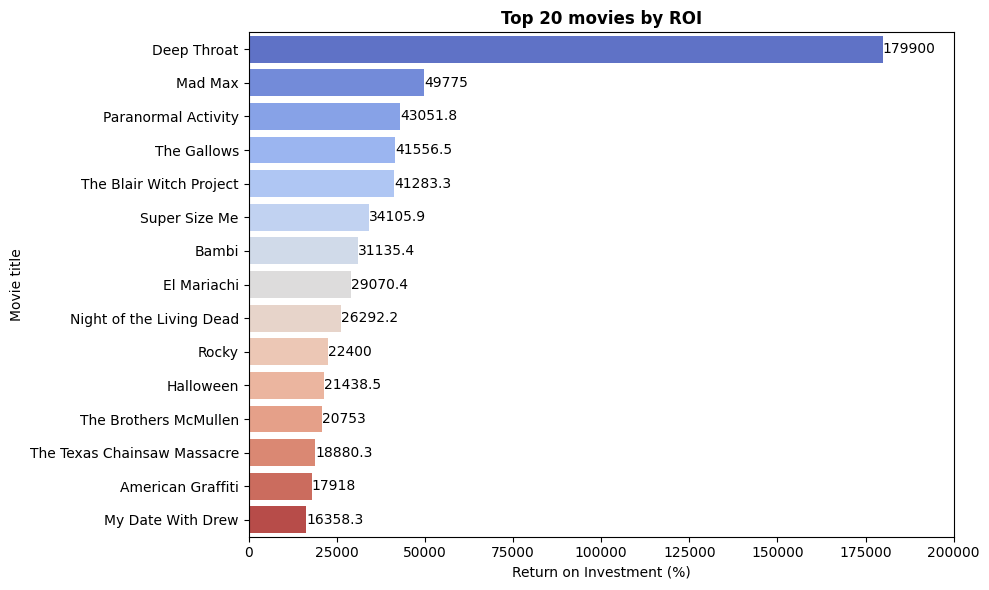

In [508]:
#top ROI movies
top_roi = tn_budgets_df.sort_values(by='roi', ascending=False).head(15)

plt.figure(figsize=(10,6))
barplot1 = sns.barplot(x='roi', y='title', data=top_roi, palette='coolwarm')

for container in barplot1.containers:
    barplot1.bar_label(container)

barplot1.set_title('Top 20 movies by ROI', weight='bold')
barplot1.set_xlabel('Return on Investment (%)')
barplot1.set_ylabel('Movie title')
plt.xlim(0, 200000)

plt.tight_layout()
plt.show()

This chart shows the top 20 movies with the highest Return on Investment (ROI) based on their financial performance, helping us identify which films have delivered the most value relative to their production budgets. Notably, `Deep Throat` leads the pack with an extraordinary ROI of 179900%, while films like `Mad Max` (49775%) and `Paranormal Activity` (43051.8%) also demonstrate remarkable returns.

These results highlight a clear trend: smaller investments can yield massive returns, especially when films leverage innovative storytelling or niche appeal rather than relying on blockbuster budgets. The chart illustrates how those movies success is often driven by creativity and unique concepts, showing that financial risk can be mitigated through originality and targeted audience engagement.


##### ROI by genre

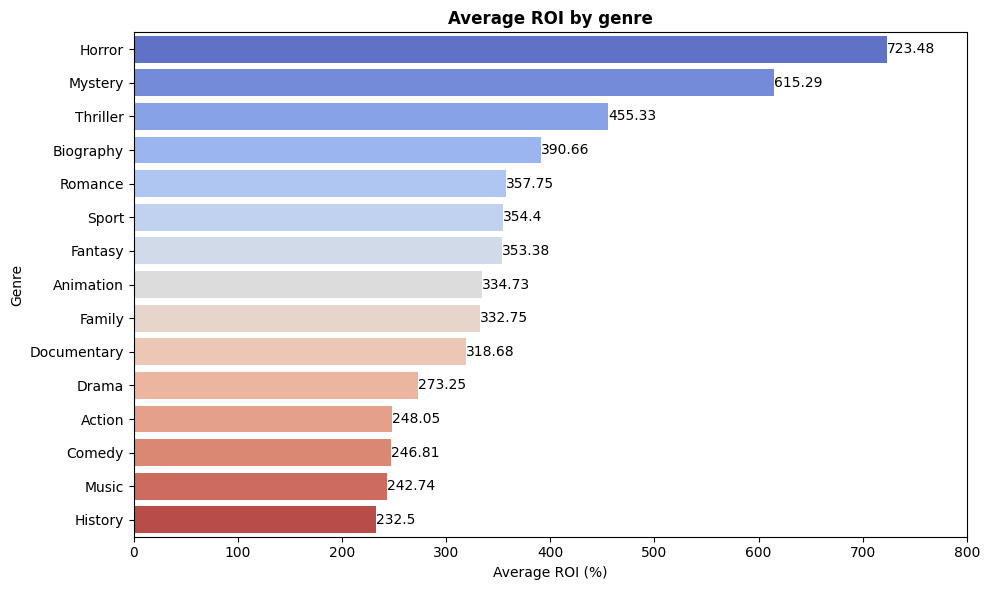

In [509]:
#merge ROI data with genres
genre_roi = pd.merge(
    tn_budgets_df[['title', 'roi']],
    df_movies_ratings_genres[['primary_title', 'genres']],
    left_on='title',
    right_on='primary_title',
    how='inner'
)

#split genres and explode into rows
#explode is used to handle movies with multiple genres so we can analyze each genre independently
genre_roi['genres'] = genre_roi['genres'].str.split(',')
genre_roi = genre_roi.explode('genres')

#calculate average ROI per genre
genre_roi_summary = genre_roi.groupby('genres')['roi'].mean().sort_values(ascending=False).head(15).round(2)

#average ROI by genre plot
plt.figure(figsize=(10,6))
barplot2 = sns.barplot(x=genre_roi_summary.values, y=genre_roi_summary.index, palette='coolwarm')

for container in barplot2.containers:
    barplot2.bar_label(container)

barplot2.set_title('Average ROI by genre', weight='bold')
barplot2.set_xlabel('Average ROI (%)')
barplot2.set_ylabel('Genre')
plt.xlim(0, 800)

plt.tight_layout()
plt.show()


`Horror` has the highest average ROI at 723.48%, indicating that horror films, on average, provide the best return on investment. This is followed by `Mystery` (615.29%) and `Thriller` (455.33%), suggesting that suspenseful and enigmatic narratives can also be highly profitable. `Action`, `Comedy`, and `Drama` also show respectable ROIs but are lower compared to the top performers, implying that while popular, they may require careful budgeting to achieve comparable ROI. `History` has the lowest average ROI of this top 15 at 232.5%, suggesting it may not be as financially viable as other genres, and the studio should approach this genre with caution.


##### Release month impact 

To understand how the release month of a movie impacts its Return on Investment (ROI), we analyzed the average ROI across different months. This analysis helps identify the best times to release films for maximizing financial returns, revealing whether certain months consistently outperform others and providing actionable insights for studio release strategies.

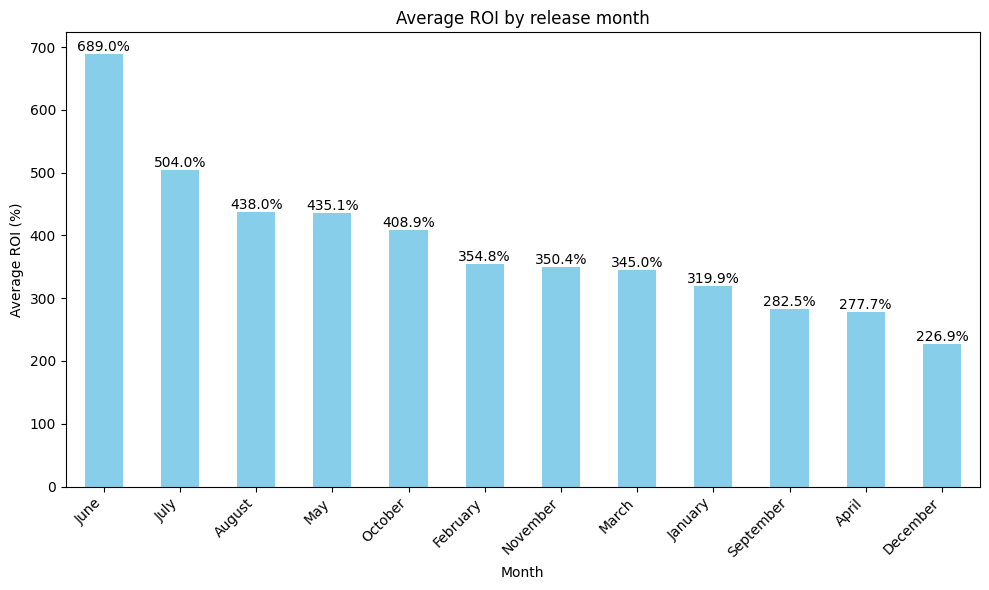

In [510]:
#group by month
monthly_roi = tn_budgets_df.groupby('release_month')['roi'].mean().sort_values(ascending=False)

ax = monthly_roi.plot(kind='bar', title='Average ROI by release month', color='skyblue', figsize=(10, 6))
ax.bar_label(ax.containers[0], fmt='%.1f%%') 

plt.xlabel('Month')
plt.ylabel('Average ROI (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The analysis of average ROI by release month reveals clear seasonal trends in movie profitability. `June` stands out with the highest average ROI at 689.0%, indicating that films released during this month tend to generate significantly greater returns compared to other months. This is closely followed by `July`, which also shows a strong ROI of 504.0%. Both months coincide with the traditional summer blockbuster season, a period when studios strategically release major films to capitalize on school breaks and increased audience turnout. 

In addition to the summer months, `May` and `October` also demonstrate relatively high ROIs (435.1% and 408.9%, respectively), making them attractive windows for film releases. Conversely, `January` and `December` have the lowest average ROIs (282.5% and 226.9%), likely due to heightened competition from holiday releases and potentially lower audience engagement. Timing does play quite an important role in maximizing financial returns, and the studio may benefit from aligning their release strategies with periods of historically higher ROI.

##### Real films and fiction Return on Investment

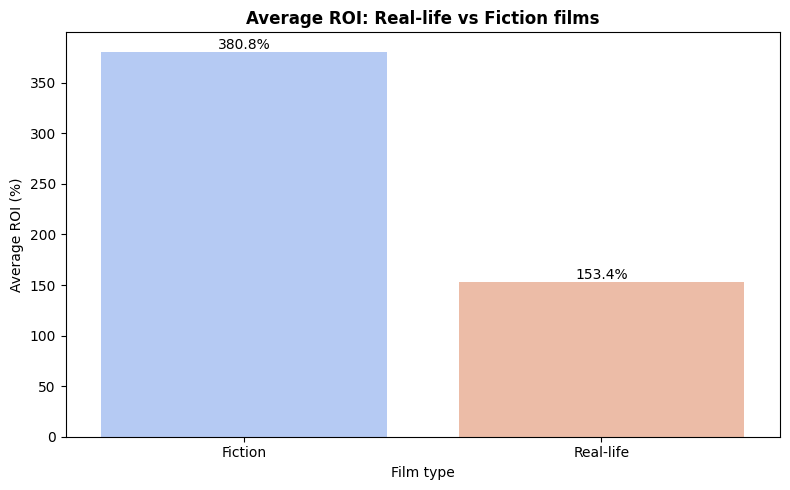

In [511]:
#find real-life films in the main DataFrame
tn_budgets_df['is_real'] = tn_budgets_df['title'].str.contains('true|real', case=False, regex=True)

#group by film type
#calculate average ROI
roi_comparison = tn_budgets_df.groupby('is_real')['roi'].mean().reset_index()
roi_comparison['is_real'] = roi_comparison['is_real'].map({True: 'Real-life', False: 'Fiction'})

plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    x='is_real', 
    y='roi', 
    data=roi_comparison, 
    palette='coolwarm',
)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f%%')

plt.title('Average ROI: Real-life vs Fiction films', weight='bold')
plt.ylabel('Average ROI (%)')
plt.xlabel('Film type')

plt.tight_layout()
plt.show()

According to the data, fiction films have a significantly higher average ROI of 380.8%, whereas real-life films achieve an average ROI of 153.4%. This indicates that, on average, fictional narratives tend to generate much higher returns relative to their production costs. The gap between the two suggests that fiction films may benefit from broader audience appeal, stronger marketing, or greater commercial viability compared to their real-life counterparts.

This disparity in ROI highlights a potential trend in audience preferences and investment outcomes. Fiction films, often built around imaginative storytelling and genre-driven content, may attract larger box office numbers and perform better across global markets. Real-life films, while often critically acclaimed or emotionally impactful, may face limitations in reach due to more niche subject matter or limited audience engagement.

##### Outlier analysis

This analysis identifies the top low-budget films that have achieved exceptionally high Return on Investment (ROI). These movies are considered outliers because they significantly exceed the upper limits of our data. By focusing on films with production budgets under $10 million, we aim to uncover cost-effective strategies for maximizing profitability. The examination of these outliers not only highlights the potential for extraordinary financial success with modest investments, but also provides valuable insights into the unique factors and approaches that set these films apart from the mainstream.

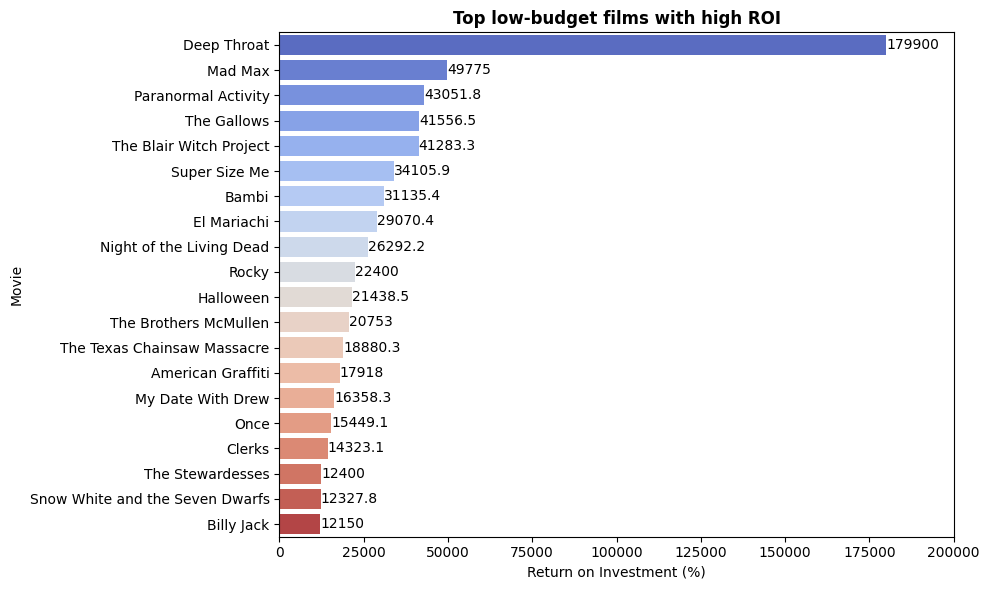

In [512]:
#filter for low-budget films
#here we target films with a production budget under $10 million
low_budget_films = tn_budgets_df[tn_budgets_df['production_budget'] < 10_000_000]

#sort by ROI to find outliers
top_low_budget_high_return = low_budget_films.sort_values(by='roi', ascending=False).head(20)

plt.figure(figsize=(10,6))
outliers_plot = sns.barplot(x='roi', y='title', data=top_low_budget_high_return, palette='coolwarm')

for container in outliers_plot.containers:
    outliers_plot.bar_label(container)

plt.title('Top low-budget films with high ROI', weight='bold')
plt.xlabel('Return on Investment (%)')
plt.ylabel('Movie')
plt.xlim(0, 200000)
plt.tight_layout()
plt.show()

Low-budget films can deliver exceptionally high ROI, with several titles generating returns exceeding thousands of percent. This suggests that financial success is not always tied to large production budgets. In fact, niche or unconventional films, such as `Deep Throat` and `The Blair Witch Project`, have historically achieved significant box office returns relative to their budgets, indicating that unique or low-cost concepts can resonate strongly with audiences. These high-performing films often rely on innovative storytelling, grassroots marketing, and audience engagement rather than big-name stars or special effects. As a result, certain underrepresented genres and themes show potential for strong performance, as evidenced by outlier films that achieved high ROI with relatively small investments.

#### Studio performance

This section analyzes the financial performance of various movie studios based on domestic and foreign gross revenue as well as their market share. By examining the market share and revenue distribution among studios, we can identify key players and understand their impact on the industry. This analysis helps inform strategic decisions related to partnerships, competitive positioning, and market entry for the new movie studio.

##### Domestic and foreign gross

In [513]:
#group by studio and calculate total domestic and foreign gross
#this will help us understand which studios are performing best financially
studio_share = bom_df.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()
studio_share = studio_share.sort_values(by='domestic_gross', ascending=False).reset_index().head(10)

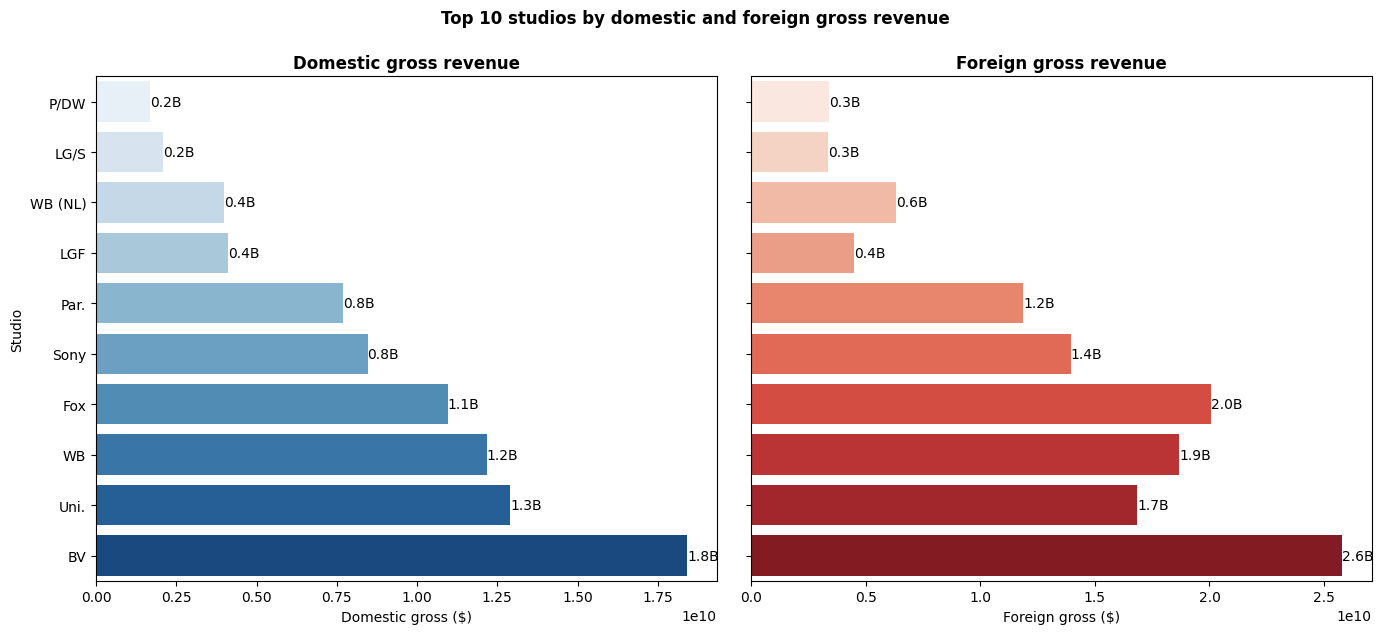

In [514]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

#domestic gross
domestic_plot = sns.barplot(ax=axes[0], x='domestic_gross', y='studio', 
            data=studio_share.sort_values('domestic_gross'), 
            palette='Blues')
axes[0].set_title('Domestic gross revenue', weight='bold')
axes[0].set_xlabel('Domestic gross ($)')
axes[0].set_ylabel('Studio')

axes[0].set_xlim(1.0)

for container in axes[0].containers:
    axes[0].bar_label(container, fmt=lambda x: f'{x / 1_000_000_000_0:.1f}B')

#foreign gross
foreign_plot = sns.barplot(ax=axes[1], x='foreign_gross', y='studio', 
            data=studio_share.sort_values('domestic_gross'), 
            palette='Reds')
axes[1].set_title('Foreign gross revenue', weight='bold')
axes[1].set_xlabel('Foreign gross ($)')
axes[1].set_ylabel('')

axes[1].set_xlim(1.0)

for container in axes[1].containers:
    axes[1].bar_label(container, fmt=lambda x: f'{x / 1_000_000_000_0:.1f}B')

plt.tight_layout()
plt.suptitle('Top 10 studios by domestic and foreign gross revenue', y=1.05, weight='bold')
plt.show()

The chart clearly shows that BV (Buena Vista Pictures) leads in both domestic and foreign gross revenue, demonstrating a strong global presence with impressive totals of $18.4 billion domestically and $25.8 billion internationally. This substantial performance indicates BV's market dominance and broad appeal. Following BV, Uni. (Universal Pictures) and WB (Warner Bros.) also exhibit strong financial results. However, their international success is more pronounced compared to their domestic earnings. Uni., for example, generates $12.9 billion domestically but nearly doubles its revenue abroad with $16.9 billion. In contrast, smaller studios such as LG/S and P/DW have significantly lower revenues, suggesting a focus on niche markets or operations on a smaller scale.

Considering the revenue disparities between domestic and foreign markets, the new studio should prioritize developing films with universal themes to maximize international box office potential. The success of studios like BV and Uni. underscores the importance of global appeal in achieving high ROI. While the top spots are dominated by large studios, there remains an opportunity for smaller studios to thrive by targeting specific genres or regions. Identifying underserved markets and unique storytelling opportunities can enable the studio to carve out a niche and cultivate a loyal audience. Furthermore, the success of major studios often correlates with robust marketing strategies and efficient distribution networks. As a new entrant, investing in targeted marketing campaigns and establishing partnerships with international distributors could help replicate this success.

##### Market share

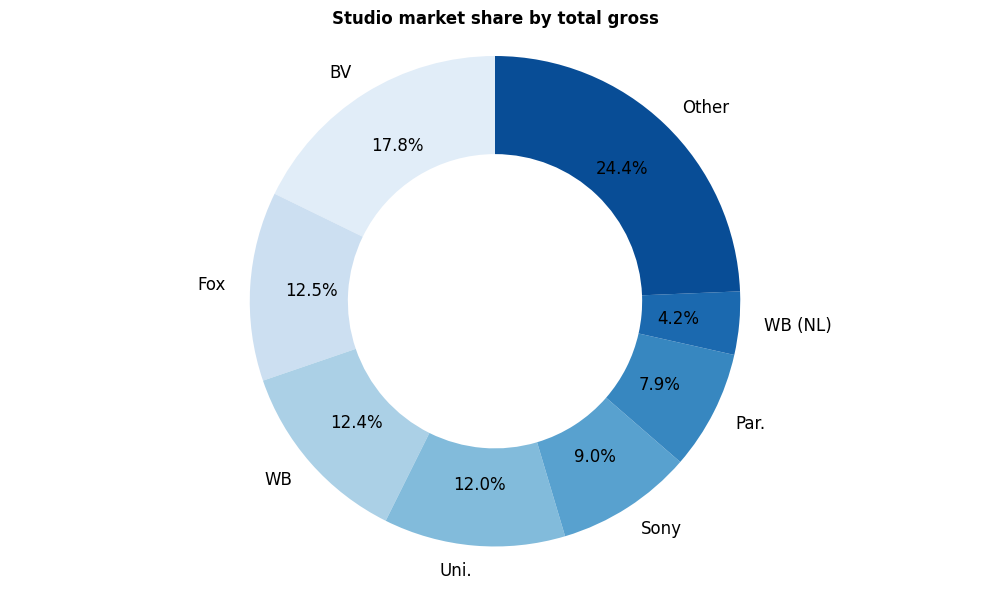

In [515]:
#calculate studio market share
studio_domestic = bom_df.groupby('studio')['total_gross'].sum().sort_values(ascending=False)
top_studios = studio_domestic.head(7)
other = pd.Series(studio_domestic.iloc[7:].sum(), index=['Other'])
studio_domestic_top = pd.concat([top_studios, other])

colors = sns.color_palette("Blues", len(studio_domestic_top))

#plot doughnut chart
fig, ax = plt.subplots(figsize=(10, 6))
wedges, texts, autotexts = ax.pie(
    studio_domestic_top,
    labels=studio_domestic_top.index,
    colors=colors,
    wedgeprops=dict(width=0.4),
    startangle=90,
    textprops={'fontsize': 12},
    pctdistance=0.75,
    autopct='%1.1f%%'
)

#add white circle in the center to make it a doughnut chart
centre_circle = plt.Circle((0, 0), 0.3, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Studio market share by total gross', weight='bold')
plt.axis('equal') 
plt.tight_layout()
plt.show()

The chart reveals that a few large studios hold significant market share. BV (Buena Vista Pictures) leads with 17.8% of the total gross revenue, demonstrating its strong market presence. Other notable studios like Fox (12.5%), WB (12.4%), and Uni. (12.0%) also have substantial shares, indicating a competitive environment. The fact that `Other` studios collectively account for 24.4% suggests a fragmented market beyond the top players, leaving room for smaller or niche studios to carve out their own space in the industry.

Given the dominance of major studios, new entrants may struggle to compete head-on. Instead, consider targeting niche genres or underserved demographics where competition is less intense. For example, specialized genres like independent films or cult classics could offer opportunities for high ROI without direct competition from major studios. Focusing on international markets or specific regions could also help build a loyal audience base before expanding globally.

The `Other` category (24.4%) suggests that many smaller studios are succeeding with low-budget productions or innovative storytelling. New studios should prioritize developing low-cost, high-ROI projects that appeal to niche audiences. Utilizing digital platforms for distribution can reduce costs and reach global audiences more efficiently. Collaborating with talented but affordable filmmakers who bring fresh ideas and creativity to the table can also be beneficial.

Establishing a brand takes time and consistent quality output. New studios should focus on creating a distinctive identity through unique themes or storytelling styles. Building a portfolio of successful films will attract talent and investors over time. Leveraging social media and digital marketing to engage directly with audiences and grow a fanbase is also essential for long-term success.


#### Popularity and rating analysis

##### Popularity and worldwide gross

<Figure size 1000x800 with 0 Axes>

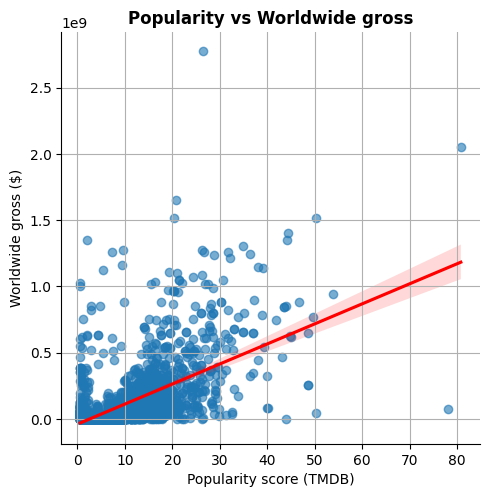

In [516]:
#merge tmdb_df with tn_budgets_df on 'title'
merged_popularity_gross = pd.merge(tmdb_df[['title', 'popularity']], tn_budgets_df[['title', 'worldwide_gross']], on='title', how='inner')

#drop rows where either popularity or worldwide_gross is missing
merged_popularity_gross.dropna(inplace=True)

#create scatter plot
plt.figure(figsize=(10, 8))
sns.lmplot(
    x='popularity',
    y='worldwide_gross',
    data=merged_popularity_gross,
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'}
)
plt.title('Popularity vs Worldwide gross', weight='bold')
plt.xlabel('Popularity score (TMDB)')
plt.ylabel('Worldwide gross ($)')
plt.grid(True)

A clear positive correlation exists between a film’s popularity and its worldwide gross revenue, as shown by the upward-sloping trend line. As TMDB popularity scores increase, so too does the likelihood of higher global earnings. This suggests that films that generate more attention and engagement tend to perform better financially on a global scale.

The majority of films are concentrated toward the lower end of both popularity and revenue, indicating that most movies fall into the category of moderate success. These films typically experience neither extraordinary visibility nor exceptional financial returns. However, there are exceptions that stand out from the general pattern, showing either high revenue with relatively low popularity or high popularity with lower than expected earnings.

The red trend line represents a linear regression that captures the overall direction of the relationship between popularity and revenue. Surrounding this line is a shaded confidence interval, which reflects the statistical reliability of the trend. The narrower the shaded area, the more consistent the relationship between the two variables across the dataset.

Some films fall well outside the expected range, demonstrating that popularity and revenue do not always align. These outliers may include niche or art-house films that receive critical praise but limited commercial success, as well as unexpected commercial hits that achieve high revenue despite lacking widespread popularity. Such deviations highlight the complex factors that influence a film’s financial performance beyond audience engagement metrics.

##### Genre distribution in IMDB rating

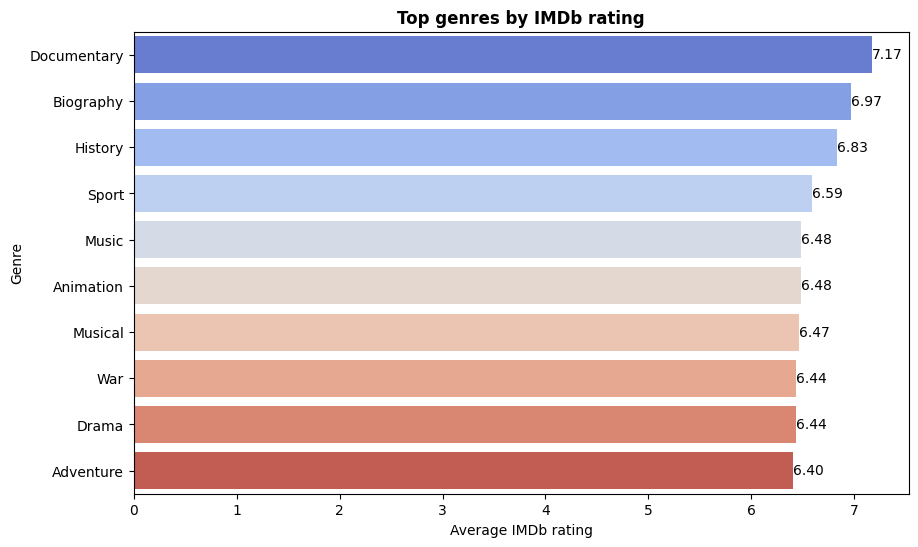

In [517]:
#join genres with ratings and budgets
genre_analysis = pd.merge(df_imdb_ratings, tn_budgets_df, on='title')

#split genres and explode into rows
genre_analysis['genres'] = genre_analysis['genres'].str.split(',')
genre_analysis = genre_analysis.explode('genres')

#group by genre and calculate metrics
genre_summary = genre_analysis.groupby('genres').agg(
    avg_rating=('imdb_rating', 'mean'),
    avg_roi=('roi', 'mean'),
    count=('genres', 'count')
).reset_index()

#filter out genres with fewer than 10 movies
genre_summary = genre_summary[genre_summary['count'] > 10]

#sort by average rating for readability
genre_summary = genre_summary.sort_values(by='avg_rating', ascending=False)

#top genres by IMDb rating
plt.figure(figsize=(10, 6))
bar = sns.barplot(x='avg_rating', y='genres', data=genre_summary.head(10), palette='coolwarm')

for container in bar.containers:
    bar.bar_label(container, fmt='%.2f') 

plt.title('Top genres by IMDb rating', weight='bold')
plt.xlabel('Average IMDb rating')
plt.ylabel('Genre')
plt.show()

Documentary holds the highest average IMDb rating at 7.17, followed by Biography at 6.97. Additional genres such as History, Sport, and Music also perform well, each maintaining an average score above 6.5. These figures indicate that films centered on real-life events, historical narratives, and musical themes tend to connect strongly with viewers, often due to their emotional depth and authenticity.

This trend presents a clear opportunity to shape content strategy around genres with proven audience appeal. A focus on Documentary, Biography, and History can position your studio as a producer of thoughtful, impactful films that resonate with critics and viewers alike. At the same time, genres like Drama and Adventure, while slightly lower in average rating, still demonstrate consistent performance and offer room for creative reinvention. 

##### Trend over time

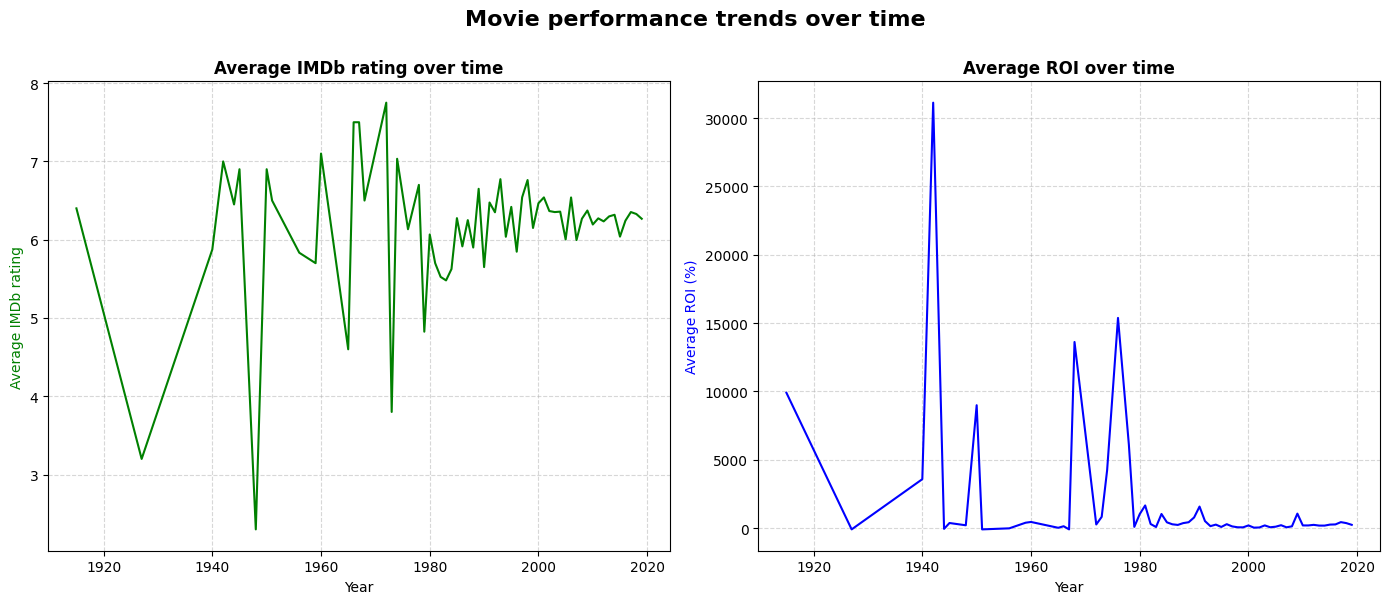

In [518]:
#merge data
yearly_analysis = pd.merge(tn_budgets_df, df_imdb_ratings[['title', 'imdb_rating']], on='title', how='inner')

#group by year
yearly_trend = yearly_analysis.groupby('release_year').agg(
    avg_rating=('imdb_rating', 'mean'),
    avg_roi=('roi', 'mean'),
    total_movies=('title', 'count')
).reset_index()

#set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

#plot 1
#average IMDb rating over time
ax1.plot(yearly_trend['release_year'], yearly_trend['avg_rating'], 'g-')
ax1.set_title('Average IMDb rating over time', weight='bold')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average IMDb rating', color='g')
ax1.grid(True, linestyle='--', alpha=0.5)

#plot 2
#average ROI over time
ax2.plot(yearly_trend['release_year'], yearly_trend['avg_roi'], 'b-')
ax2.set_title('Average ROI over time', weight='bold')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average ROI (%)', color='b')
ax2.grid(True, linestyle='--', alpha=0.5)

fig.suptitle('Movie performance trends over time', fontsize=16, y=1, weight='bold')

fig.tight_layout()
plt.show()

IMDb ratings of films show a distinct pattern when examined over time. In the early years (1920s–1940s), average scores are relatively high but marked by considerable variation. A notable decline occurs during the 1930s, which may reflect shifts in production standards or evolving audience expectations. From the 1950s through the 1980s, ratings become more stable, settling within a range of 6.5 to 7.0. A high point is reached in the 1960s, signaling a period of particularly strong reception for films released during that decade. Since the 1990s, average ratings have remained fairly consistent, suggesting that contemporary audiences continue to appreciate films at a level comparable to those of earlier generations.

When it comes to financial performance, the data reveals a different trend. In the 1920s to 1940s, return on investment starts low but jumps sharply in the 1940s, reaching an unusually high peak. This increase may be linked to factors such as the influence of wartime films or the success of major releases during that time. From the 1950s through the 1980s, ROI experiences notable swings, with strong returns seen in both the 1950s and 1970s—periods that likely reflect changes in production strategies or revenue generation methods. In recent decades (1990s–2020), ROI has leveled off at lower levels compared to earlier peaks, potentially due to rising production expenses, increased market saturation, or shifts in how films generate revenue.

##### MPAA rating on revenue category

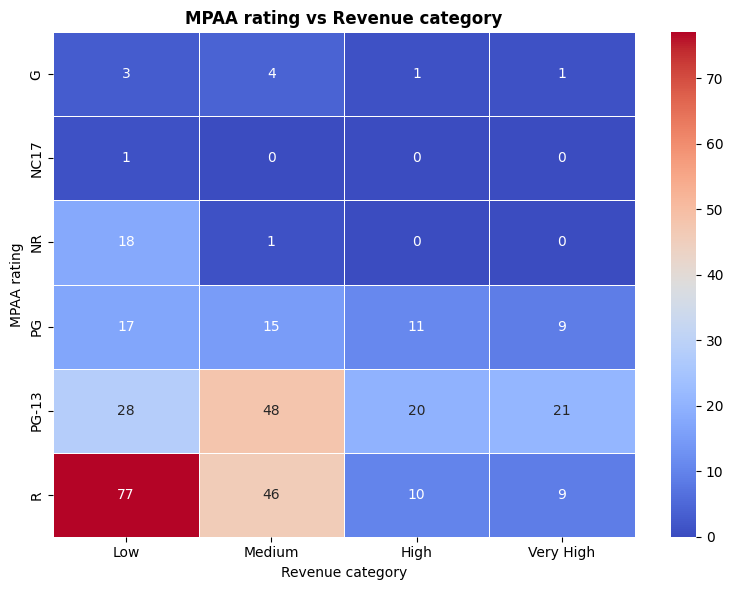

In [519]:
#build contingency table
contingency_table = pd.crosstab(rt_info['rating'], rt_info['revenue_category'])

#plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    contingency_table,
    annot=True,                     
    fmt='d',                        
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size": 10}
)

plt.title('MPAA rating vs Revenue category', weight='bold')
plt.xlabel('Revenue category')
plt.ylabel('MPAA rating')
plt.tight_layout()
plt.show()

This heatmap illustrates how MPAA ratings (G, NC-17, NR, PG, PG-13, R) relate to different revenue categories (Low, Medium, High, Very High). The color intensity in each cell reflects the number of films that fall into a specific rating and revenue combination. 

R-rated films appear most frequently across all revenue levels, especially in the Medium and Very High categories. For instance, R-rated films in the Medium revenue group total 46, making them the most common among high-revenue films. PG-13 films also show strong performance, particularly in the Medium and High revenue ranges. PG-13 movies are widely distributed and found across all revenue tiers, with the highest count of 48 in the Medium category. This suggests that PG-13 films are able to reach a wide audience and consistently achieve moderate to strong financial results. In contrast, G-rated films are mostly found in the Low revenue category, pointing to a more limited audience appeal. NC-17 films have very low numbers across all revenue levels, indicating minimal market presence or acceptance. NR films show a moderate presence, appearing in both the Medium and Very High revenue categories. PG-rated films also demonstrate moderate success, with notable representation in the Medium and High revenue groups, showing they can perform reasonably well at the box office.

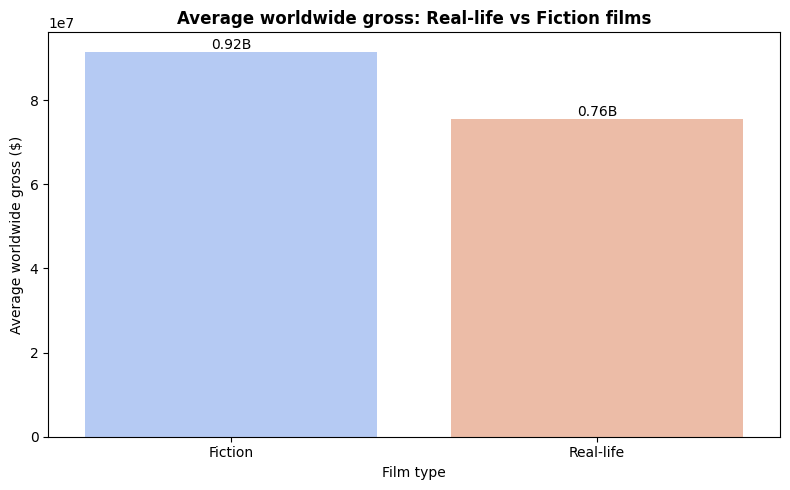

In [520]:
# Split ratings
real_gross = tn_budgets_df[tn_budgets_df['is_real']]['worldwide_gross']
fiction_gross = tn_budgets_df[~tn_budgets_df['is_real']]['worldwide_gross']

# Average worldwide gross
avg_gross = tn_budgets_df.groupby('is_real')['worldwide_gross'].mean().reset_index()
avg_gross['is_real'] = avg_gross['is_real'].map({True: 'Real-life', False: 'Fiction'})

# Plot
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    x='is_real', 
    y='worldwide_gross', 
    data=avg_gross, 
    palette='coolwarm'
)

for container in barplot.containers:
    barplot.bar_label(container, fmt=lambda x: f'{x / 1e8:.2f}B') 

# Final touches
plt.title('Average worldwide gross: Real-life vs Fiction films', weight='bold')
plt.ylabel('Average worldwide gross ($)')
plt.xlabel('Film type')
plt.tight_layout()
plt.show()

Fiction films have an average worldwide gross of $0.92 billion, while real-life films achieve an average worldwide gross of $0.76 billion. This indicates that, on average, fiction films tend to generate higher global revenue compared to real-life films.

This difference in worldwide gross suggests that fiction films may benefit from broader international appeal, larger marketing budgets, or more extensive distribution networks. Fictional narratives often cater to a wide range of audiences across different cultures and demographics, which can contribute to their stronger financial performance globally. In contrast, real-life films, while potentially resonating with specific audiences or themes, may face limitations in reaching as broad an audience as fiction films do.

#### Actors and directors

##### Top directors

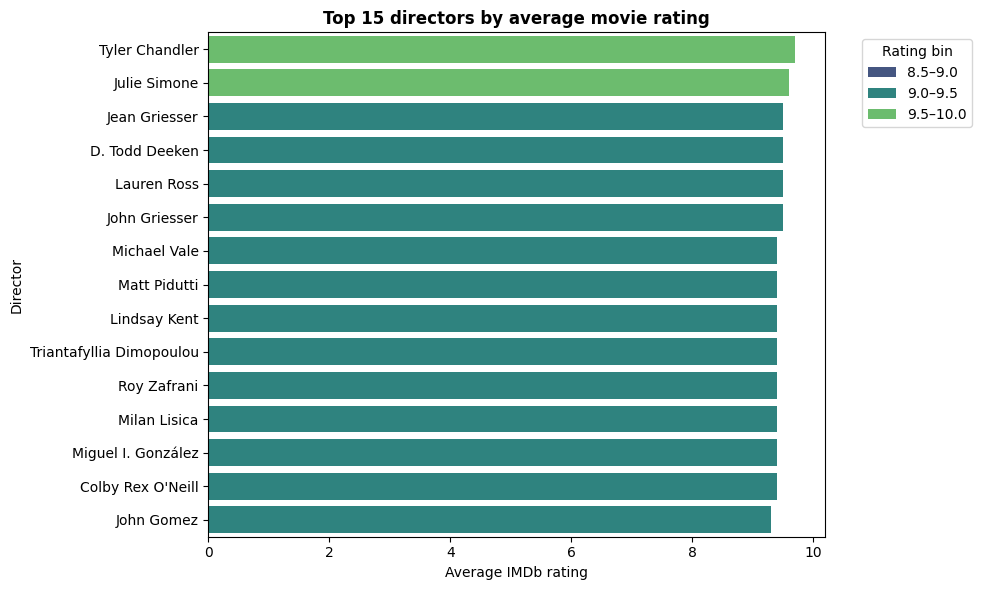

In [521]:
#define bins for IMDb ratings
bins = [8.5, 9.0, 9.5, 10.0]
labels = ['8.5–9.0', '9.0–9.5', '9.5–10.0']

#create a new column for rating bins
df_director_stats['rating_bin'] = pd.cut(df_director_stats['avg_rating'], bins=bins, labels=labels)

#top 15 directors
df_director_top15 = df_director_stats.sort_values('avg_rating', ascending=False).head(15)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='avg_rating', 
    y='director_name', 
    data=df_director_top15, 
    hue='rating_bin', 
    dodge=False,
    palette='viridis'
)

plt.title('Top 15 directors by average movie rating', weight='bold')
plt.xlabel('Average IMDb rating')
plt.ylabel('Director')
plt.legend(title='Rating bin', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Several directors, including Tyler Chandler and Julie Simone, maintain exceptionally high average IMDb ratings within the `9.5–10.0` range, suggesting a consistent ability to deliver films that receive widespread critical acclaim. Others, such as Jean Griesser and D. Todd Deeken, fall just below in the `9.0–9.5` range, still reflecting a strong track record of quality filmmaking, though slightly less consistent at the highest level. These distinctions highlight the varying degrees of directorial impact on audience and critic reception.

For a new studio, the opportunity lies in leveraging this performance data to shape talent acquisition and creative direction. Directors in the top tier offer a proven ability to generate high-quality content that resonates with audiences, making them valuable partners for projects aiming to build prestige. At the same time, those in the second tier represent a pool of rising talent that, with the right support and resources, could develop into top-tier contributors. Establishing partnerships with filmmakers who align with your studio’s vision, whether established or emerging, can help build a strong brand identity centered on quality and critical recognition. This approach not only enhances the likelihood of producing well-received films but also strengthens the studio’s reputation over time.

##### Top actors

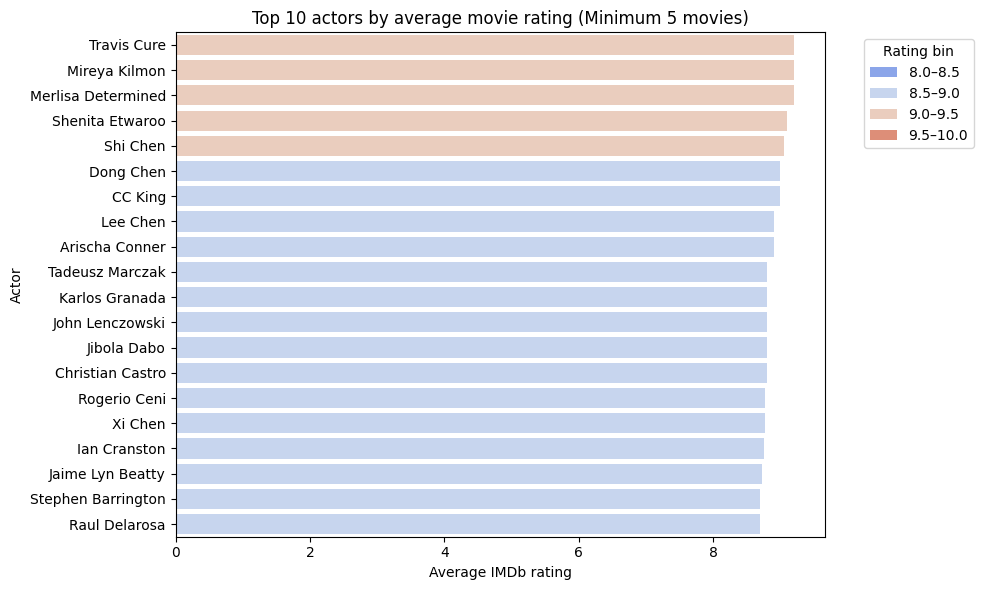

In [522]:
#define rating bins
bins = [8.0, 8.5, 9.0, 9.5, 10.0]
labels = ['8.0–8.5', '8.5–9.0', '9.0–9.5', '9.5–10.0']

df_top_actors['rating_bin'] = pd.cut(df_top_actors['avg_rating'], bins=bins, labels=labels)

#sort by average rating
df_top_actors_sorted = df_top_actors.sort_values(by='avg_rating', ascending=False)

#plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='avg_rating',
    y='actor_name',
    hue='rating_bin',
    data=df_top_actors_sorted,
    dodge=False,
    palette='coolwarm'
)

plt.title('Top 10 actors by average movie rating (Minimum 5 movies)')
plt.xlabel('Average IMDb rating')
plt.ylabel('Actor')
plt.legend(title='Rating bin', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Actors with consistently high IMDb ratings, including Travis Cure, Mireya Kilmon, and Merlisa Determined, all of whom fall within the 9.0–9.5 or 9.5–10.0 rating ranges, indicating a strong track record of critical acclaim across multiple films. While these top performers stand out, many other actors show ratings clustered in the 8.5–9.0 range, reflecting solid and dependable performances, though slightly below the highest tier. The use of color-coded rating bins helps illustrate how actors are distributed across different levels of audience reception. To ensure statistical relevance, the chart only includes actors with at least five film appearances, providing a reliable basis for evaluating their overall performance and popularity.

##### Top actor and director pairs

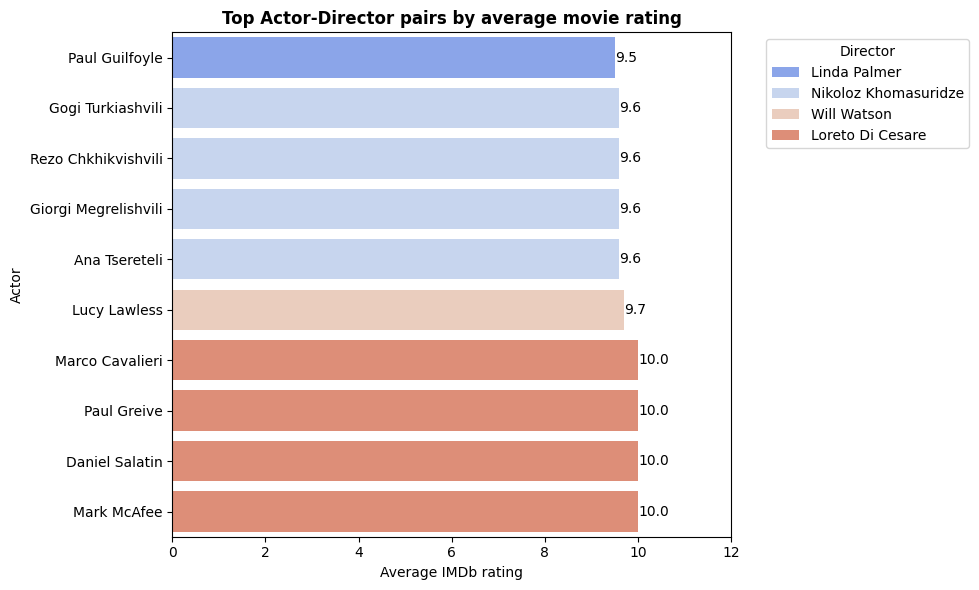

In [523]:
#sort by average rating for better visual order
df_actor_director = df_actor_director.sort_values(by='avg_rating', ascending=True)

#plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='avg_rating',
    y='actor',
    data=df_actor_director,
    hue='director',
    dodge=False,
    palette='coolwarm'
)

for container in barplot.containers:
    barplot.bar_label(container, fmt='%.1f')

plt.title('Top Actor-Director pairs by average movie rating', weight='bold')
plt.xlabel('Average IMDb rating')
plt.ylabel('Actor')
plt.legend(title='Director', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(0, 12)

plt.tight_layout()
plt.show()

Certain actor-director partnerships, such as those featuring Paul Guilfoyle, Gogi Turkiashvili, and Mark McAfee, consistently achieve exceptionally high IMDb ratings, often in the 9.5–10.0 range. These pairings demonstrate a strong creative synergy that leads to the production of critically acclaimed films. The repeated success of these collaborations underscores the impact of strong working relationships in the filmmaking process.

For a new studio, the data provides a clear direction for strategic decision-making. Collaborations between actors and directors with a history of high ratings should be a priority, as they are linked to quality outcomes and audience approval. Examples such as Linda Palmer and Paul Guilfoyle or Loreto Di Cesare and Mark McAfee illustrate the potential for excellence when proven talents work together. At the same time, emerging partnerships involving directors like Nikoloz Khomasuridze and Will Watson show early promise and may represent valuable opportunities for growth and development.

#### Sequel vs Original movies

##### Ratings

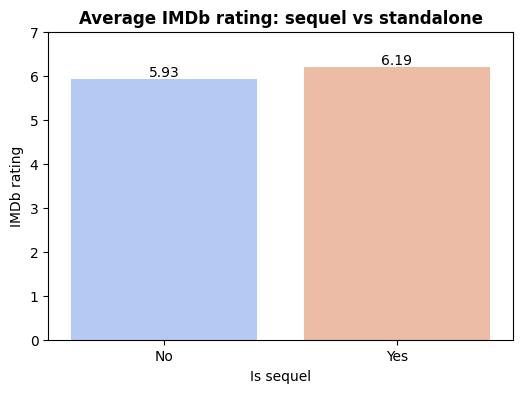

In [524]:
#find sequels
tmdb_df['is_sequel'] = tmdb_df['title'].str.contains(r'Part \d+|II|III|IV|Episode \d+', case=False, regex=True)

#merge with IMDb ratings
tmdb_ratings = pd.merge(tmdb_df, df_imdb_ratings[['title', 'imdb_rating']], on='title', how='inner')

#compare average ratings
sequel_ratings = tmdb_ratings.groupby('is_sequel')['imdb_rating'].mean().reset_index()

plt.figure(figsize=(6, 4))
barplot = sns.barplot(
    x='is_sequel', 
    y='imdb_rating', 
    data=sequel_ratings, 
    palette='coolwarm'
)

for container in barplot.containers:
    barplot.bar_label(container, fmt=lambda x: f'{x :.2f}')

# Final touches
plt.title('Average IMDb rating: sequel vs standalone', weight='bold')
plt.xlabel('Is sequel')
plt.ylabel('IMDb rating')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(0, 7)

plt.show()

Sequels tend to receive higher average IMDb ratings (6.19) compared to standalone films (5.93), suggesting that, on average, they are viewed more positively by audiences. This pattern may be driven by the presence of an established fan base, as well as the built-in anticipation that comes with continuing a known story. Viewers who are already invested in characters and plotlines are more likely to engage with and appreciate follow-up films, contributing to the overall boost in ratings.

For the new studio, this trend highlights the potential benefits of investing in sequels or franchise-driven content. The advantage of existing brand recognition can lead to stronger initial reception and audience loyalty. However, this strategy should be weighed against factors such as production costs, creative sustainability, and the risk of oversaturation. Rather than relying solely on sequels, a balanced approach combining franchise development with innovative standalone projects can help maintain both artistic diversity and financial stability.

##### Impact of realease period on worldwide gross

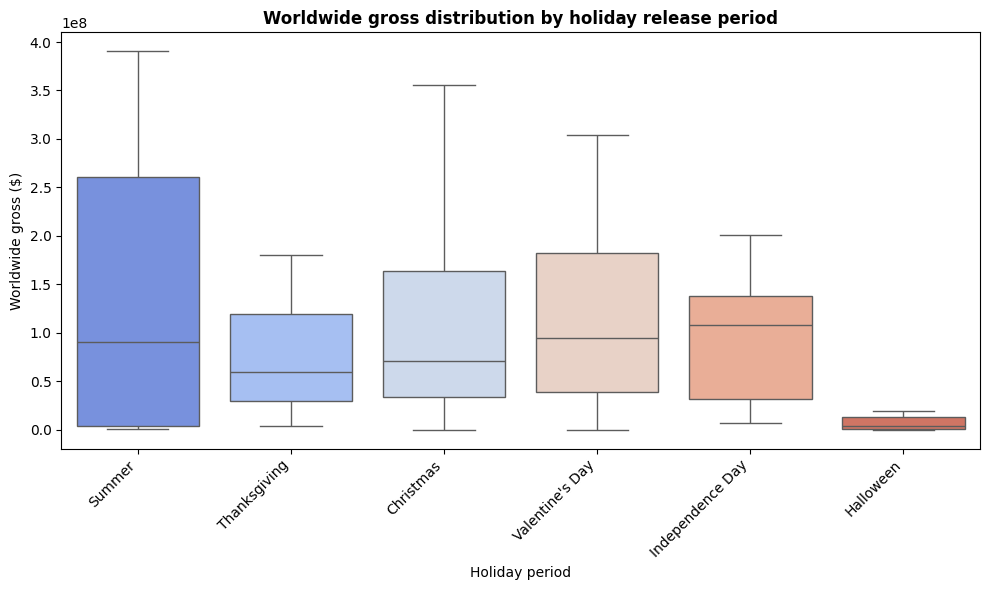

In [525]:
#define key holiday periods
holiday_periods = {
    '02-14': 'Valentine\'s Day',
    '07-04': 'Independence Day',
    '06-14': 'Summer',
    '10-31': 'Halloween',
    '11-23': 'Thanksgiving',
    '12-25': 'Christmas'
}

#map holiday periods
#filter data
tn_budgets_df['holiday_period'] = tn_budgets_df['month_day'].map(holiday_periods)
tn_df = tn_budgets_df.dropna(subset=['holiday_period'])

#group by holiday period and sort
tn_df_grouped = tn_df.groupby('holiday_period', as_index=False)['worldwide_gross'].mean().sort_values('worldwide_gross', ascending=False)

plt.figure(figsize=(10,6))
sns.boxplot(
    x='holiday_period',
    y='worldwide_gross',
    data=tn_df,
    palette='coolwarm',
    showfliers=False  #remove outliers for clarity
)

plt.title('Worldwide gross distribution by holiday release period', weight='bold')
plt.xlabel('Holiday period')
plt.ylabel('Worldwide gross ($)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The box plots show that Summer stands out as the most lucrative period, with a median worldwide gross exceeding $250 million and a wide range of high-performing films. This indicates that releasing films during summer blockbusters can lead to substantial revenue, likely due to increased audience turnout and marketing opportunities during this peak season. Other notable periods include Christmas and Valentine's Day, which also demonstrate strong performance, though slightly lower than Summer Blockbuster. In contrast, Halloween have significantly lower median revenues, suggesting this period may not be as favorable for major releases unless strategically targeted.

##### Holiday performance

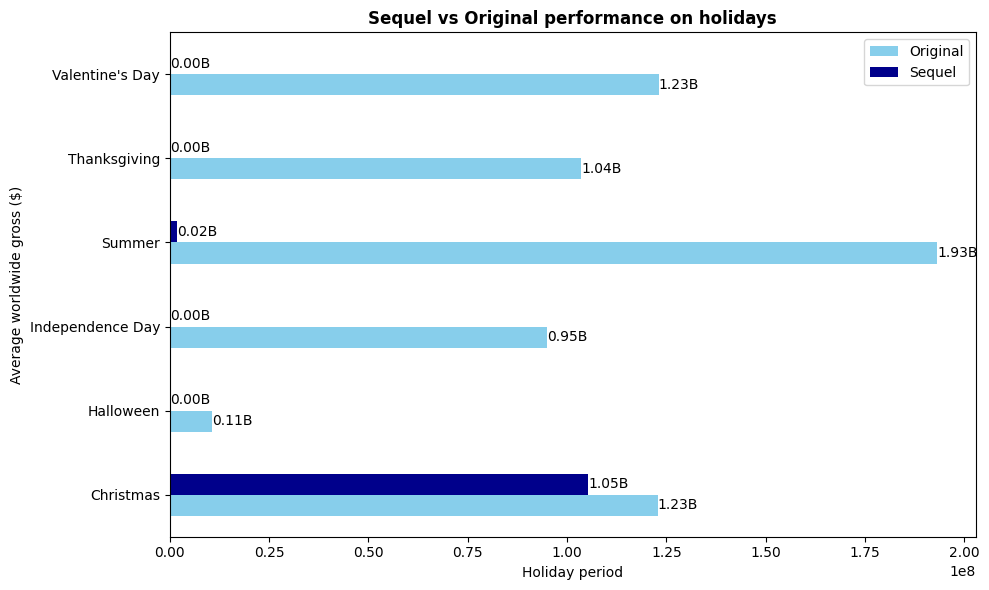

In [526]:
tn_budgets_df['is_sequel'] = tn_budgets_df['title'].str.contains(r'Part \d+|II|III|IV|Episode \d+', case=False, regex=True)

#group by holiday and sequel status
sequel_holiday = tn_budgets_df.groupby(['holiday_period', 'is_sequel'])['worldwide_gross'].mean().unstack(fill_value=0)

ax = sequel_holiday.plot(kind='barh', figsize=(10,6), color=['skyblue', 'darkblue'])

for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{x / 1e8:.2f}B')

plt.title('Sequel vs Original performance on holidays', weight='bold')
plt.xlabel('Holiday period')
plt.ylabel('Average worldwide gross ($)')
plt.legend(['Original', 'Sequel'])

plt.tight_layout()
plt.show()

Original films achieve exceptionally high average revenue during the summer, reaching nearly $1.9 billion, while sequels perform significantly lower in this period. This pattern suggests that audiences are especially drawn to fresh, blockbuster content during the peak summer season. In contrast, Christmas shows a more balanced performance between original and sequel films, indicating that both types can succeed during this family-oriented holiday.

The summer blockbuster season is the most favorable time for releasing high-concept, original films, as audiences appear particularly receptive to new stories. Sequels, while less successful in summer, may perform better during other holidays such as Thanksgiving or Valentine's Day, when competition from original blockbusters is less intense and established franchises can leverage their existing fan bases. Careful planning around release timing and content type can help studios capitalize on these seasonal trends and maximize box office returns.

##### Genre distribution

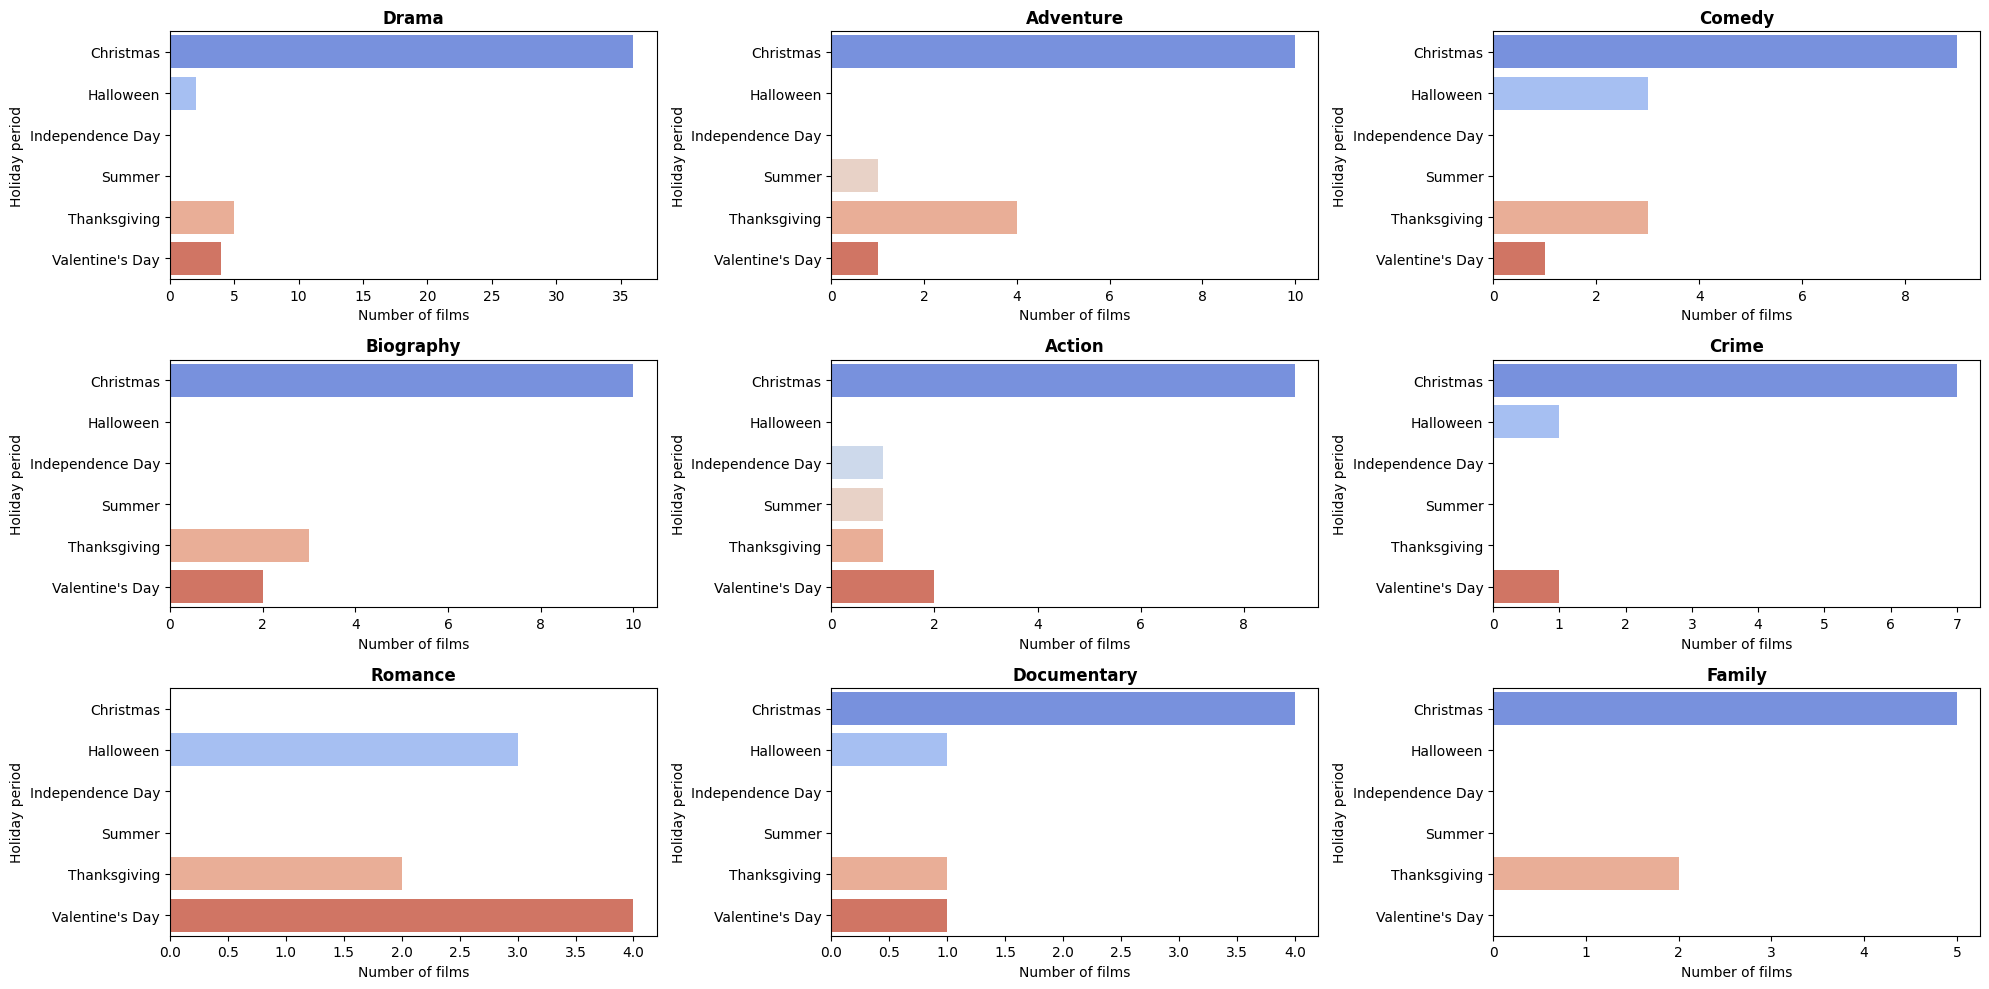

In [527]:
#merge on 'title'
tn_df_with_genre = pd.merge(
    tn_df, 
    df_movies_ratings_genres[['primary_title', 'genres']], 
    left_on='title', 
    right_on='primary_title', 
    how='inner'
)

#drop redundant column
tn_df_with_genre.drop(columns=['primary_title'], inplace=True)

#split genres
#explode into rows
tn_df_with_genre['genres'] = tn_df_with_genre['genres'].str.split(',')
tn_df_genre_exploded = tn_df_with_genre.explode('genres')

#top most common genres in tn_df_with_genre
top_genres = tn_df_genre_exploded['genres'].value_counts().index[:9]

#filter and group
genre_holiday_counts = tn_df_genre_exploded[tn_df_genre_exploded['genres'].isin(top_genres)]
genre_holiday_counts = pd.crosstab(genre_holiday_counts['holiday_period'], genre_holiday_counts['genres'])

#create subplots
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()

for i, genre in enumerate(top_genres):
    #subset data for the current genre
    genre_data = genre_holiday_counts[genre]
    
    ax = axes[i]
    sns.barplot(x=genre_data.values, y=genre_data.index, ax=ax, palette='coolwarm')
    ax.set_title(f"{genre}", weight='bold')
    ax.set_xlabel("Number of films")
    ax.set_ylabel("Holiday period")
    ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Christmas stands out as the most successful period across nearly all film genres. This trend highlights a strong correlation between audience turnout and marketing effectiveness during the holiday season, making it an ideal time for studios to release films in a wide range of categories. Particularly for genres such as Drama, Comedy, and Family, Christmas offers a prime opportunity to maximize visibility and engagement. Certain other genres also show clear seasonal preferences. Romance and Biography films, for example, perform best around Valentine’s Day, reflecting the emotional and sentimental tone of the holiday. Action films see the highest performance during the summer months, a time traditionally dominated by blockbuster releases. Although not shown in the data, Horror films are likely to peak around Halloween, aligning with the thematic and cultural expectations of the season.

A key takeaway for the studio is the importance of aligning film genres with culturally relevant holidays to enhance audience appeal. Releasing films during periods that naturally resonate with their themes can significantly boost engagement and box office performance. Strategic scheduling should include prioritizing Christmas for broad-appeal genres, targeting Valentine’s Day for romance-driven content, and focusing on the summer season for high-energy action films. At the same time, less competitive periods should not be overlooked. Opportunities exist for carefully selected projects to gain attention by filling gaps in the market.

#### Niche movies

A critical component of the analysis focuses on identifying films that are highly rated by audiences, yet underrepresented in mainstream distribution due to relatively low vote counts. These films represent underrated opportunities that may offer valuable insights into audience preferences, genre performance, and storytelling effectiveness, all of which can inform strategic decisions for a new movie studio.

Films with an IMDb rating above 8 and fewer than 10,000 votes are highlighted as critically loved but not widely seen. These movies may serve as inspiration for remakes, candidates for re-release, or models for low-budget, high-impact productions.

##### Top niche films

The top 10 niche films were identified based on their IMDb ratings, with each scoring a perfect 10.0 out of 10. Despite their critical acclaim, these films remain largely unknown to mainstream audiences, as reflected by their low vote counts. Most of these titles are documentaries or dramas, such as `A Dedicated Life: Phoebe Brand Beyond the Group`, `Exteriores: Mulheres Brasileiras na Diplomacia`, `Revolution Food`, and `Dog Days in the Heartland`. The consistent high ratings suggest that exceptional storytelling and unique perspectives can resonate deeply with viewers, even without widespread recognition. For a new movie studio, these films highlight the potential of exploring unconventional narratives or collaborating with underrated filmmakers to achieve both artistic and audience impact.

In [528]:
#filter highly rated but with fewer than 10,000 votes
niche_films = df_movies_ratings_genres[
    (df_movies_ratings_genres['averagerating'] > 8) &
    (df_movies_ratings_genres['numvotes'] < 10000)
]

#sort by rating for better readability
niche_films = niche_films.sort_values(by='averagerating', ascending=False)

#show top 10 niche films
top_niche_films = niche_films.head(10)
top_niche_films[['primary_title', 'genres', 'averagerating', 'numvotes']].style.bar(color='grey', subset=['numvotes'])


,primary_title,genres,averagerating,numvotes
63957,A Dedicated Life: Phoebe Brand Beyond the Group,Documentary,10.000000,5
693,Exteriores: Mulheres Brasileiras na Diplomacia,Documentary,10.000000,5
49589,Revolution Food,Documentary,10.000000,8
49431,Dog Days in the Heartland,Drama,10.000000,5
70796,Pick It Up! - Ska in the '90s,Documentary,10.000000,5
60199,Requiem voor een Boom,Documentary,10.000000,5
65059,Ellis Island: The Making of a Master Race in America,"Documentary,History",10.000000,6
65246,Calamity Kevin,"Adventure,Comedy",10.000000,6
9664,Freeing Bernie Baran,"Crime,Documentary",10.000000,5
72817,Renegade,Documentary,10.000000,20


##### Genre distribution

The genre composition of niche films was analyzed by splitting genre lists and expanding them into individual entries. The most frequent genres were then identified, revealing which types are most common among highly rated but less popular movies. These findings suggest that a new studio may benefit from exploring genres that are not commercially dominant, as they could uncover high-quality stories that resonate with specific audience segments or streaming platforms.

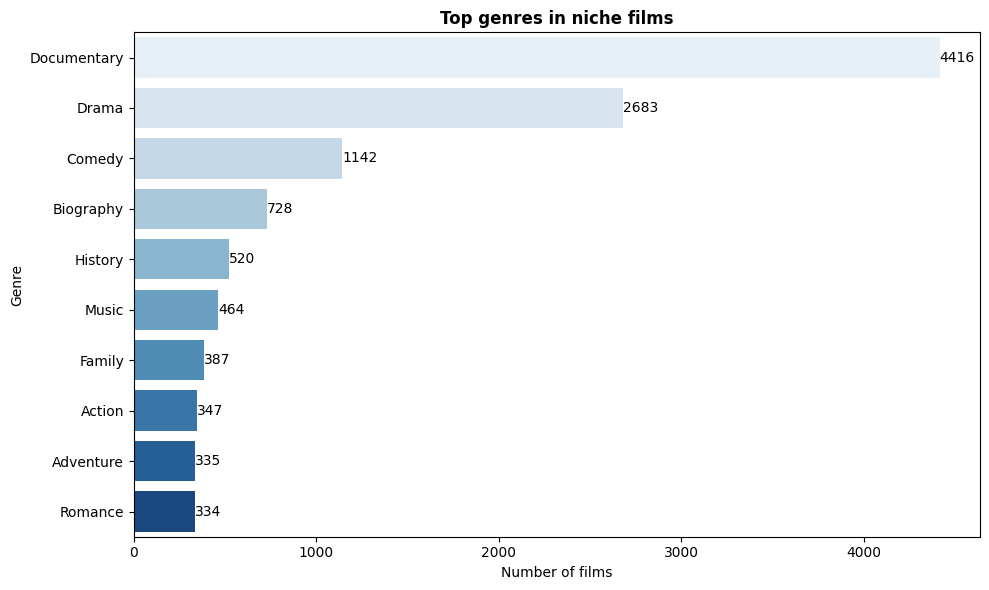

In [529]:
#split genres and explode
niche_films['genres'] = niche_films['genres'].str.split(',')
niche_genres = niche_films.explode('genres')

#count genre frequency
genre_counts = niche_genres['genres'].value_counts().head(10)

#plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Blues')

for container in barplot.containers:
    barplot.bar_label(container)

plt.title('Top genres in niche films', weight='bold')
plt.xlabel('Number of films')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

This analysis identifies a set of highly rated but under-the-radar films that have received strong audience approval (IMDb rating > 8) but have not reached mainstream visibility, as indicated by their relatively low vote counts (<10,000). These niche films include documentaries, dramas, and biographical stories that often explore unique or culturally rich themes. Despite their limited reach, these films maintain a strong average rating, suggesting that they resonate deeply with the audiences who do watch them. Examples include titles like The Act of Killing and Searching for Sugar Man, which are critically acclaimed yet commercially modest, reinforcing the idea that quality does not always equate to popularity.

The findings suggest that a new movie studio can find opportunity in these underrated but impactful films by targeting passionate audience segments through streaming platforms, film festivals, or limited theatrical releases. These films often require lower production budgets, making them ideal for cost-effective, high-impact storytelling. By focusing on genres like documentary, biography, and history, the studio can differentiate itself in a market dominated by high-budget blockbusters. This strategy allows for brand building, audience loyalty, and creative freedom, all while minimizing financial risk. Investing in niche content could lead to long-term success by cultivating a dedicated fanbase that values authenticity, originality, and emotional resonance.

##### Popularity vs Quality

A scatter plot illustrates the relationship between the number of votes (popularity) and IMDb ratings (quality) for all films. Niche films appear as green outliers, characterized by high ratings but low vote counts, and form a distinct cluster apart from mainstream titles.

The x-axis uses a log scale to represent the number of votes, while the y-axis shows IMDb ratings. A red dashed line marks the 10,000-vote threshold that identifies niche films.

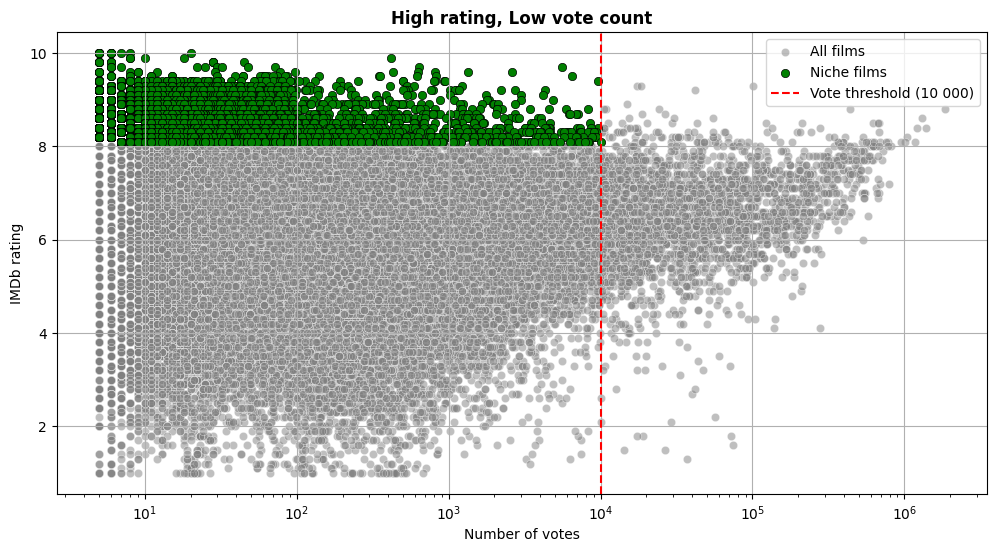

In [530]:
#plot niche films vs overall distribution
plt.figure(figsize=(12, 6))

sns.scatterplot(
    x='numvotes',
    y='averagerating',
    data=df_movies_ratings_genres,
    alpha=0.5,
    color='gray',
    label='All films'
)

sns.scatterplot(
    x='numvotes',
    y='averagerating',
    data=niche_films,
    color='green',
    label='Niche films',
    edgecolor='black'
)

plt.title('High rating, Low vote count', weight='bold')
plt.xlabel('Number of votes')
plt.ylabel('IMDb rating')
plt.xscale('log')
plt.axvline(10000, color='red', linestyle='--', label='Vote threshold (10 000)')
plt.legend()
plt.grid(True)
plt.show()

The green dots representing niche films illustrate a distinct group of movies with exceptionally high IMDb ratings but relatively low vote counts, indicating that while these films are critically acclaimed, they have not reached a wide audience. This suggests that they are underrated in terms of visibility, and could benefit from targeted marketing efforts or strategic re-releases to increase their impact.

There is a growing opportunity for the studio to focus on niche films, which often fall into genres such as documentary, biography, and historical drama categories that appear frequently among high-rated, low-visibility films. These films typically require lower production budgets, making them ideal for cost-effective, high-impact projects. By investing in similar content, the studio can engage passionate audience segments, build brand loyalty, and establish a reputation for quality-driven, innovative storytelling that stands out from mainstream competition.

##### Niche vs Mainstream movies

This section compares the average IMDb rating of niche films to the overall average IMDb rating across all films. The results indicate that audience engagement is often more meaningful than vote count. Studios may achieve success by focusing on content quality and targeted distribution, rather than pursuing mainstream box office dominance.

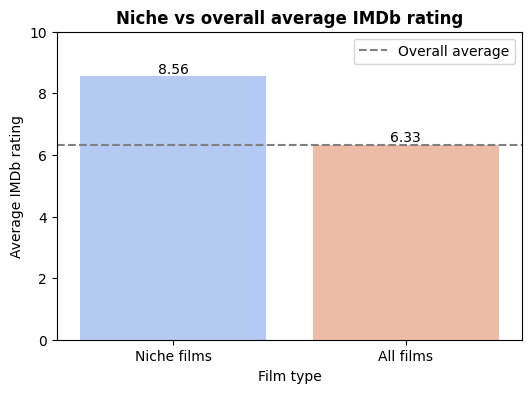

In [531]:
#overall average rating
overall_avg = df_movies_ratings_genres['averagerating'].mean()

#niche films average rating
niche_avg = niche_films['averagerating'].mean()

#create comparison data
comparison = pd.DataFrame({
    'Film type': ['Niche films', 'All films'],
    'Average rating': [niche_avg, overall_avg]
})

plt.figure(figsize=(6, 4))
rating_plot = sns.barplot(x='Film type', y='Average rating', data=comparison, palette='coolwarm')

for container in rating_plot.containers:
    rating_plot.bar_label(container, fmt='%.2f')

plt.title('Niche vs overall average IMDb rating', weight='bold')
plt.ylabel('Average IMDb rating')
plt.axhline(df_movies_ratings_genres['averagerating'].mean(), color='gray', linestyle='--', label='Overall average')
plt.ylim(0, 10)

plt.legend()
plt.show()

This analysis compares the average IMDb ratings of niche films to the overall average IMDb rating across all films. The chart highlights important differences in audience reception between these two groups. Niche films, represented by the blue bar, have an average IMDb rating of 8.56, which is significantly higher than the overall average of 6.33 shown by the orange bar. Despite limited visibility and lower vote counts, niche films receive strong critical acclaim from viewers. These films often feature unique themes, genres, or storytelling styles that resonate deeply with specific audiences. The results suggest that niche films offer a higher quality-to-popularity ratio compared to mainstream releases.

##### Niche films overtime

A line chart tracks the number of niche films released each year, revealing trends in the frequency of critically acclaimed but under-the-radar movies. The results show whether these films are becoming more common or increasingly rare over time.

This insight helps a new movie studio identify opportunities to tap into the growing pipeline of niche content and build a brand focused on quality-driven storytelling.

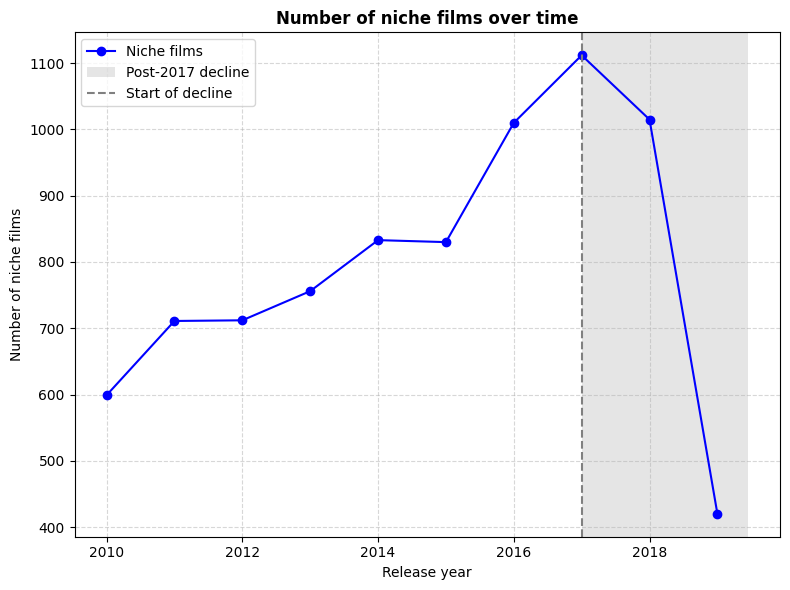

In [532]:
#add release year
niche_films['year'] = niche_films['start_year'].astype(int)
niche_films_by_year = niche_films.groupby('year').size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(8, 6))
niche_release = ax.plot(niche_films_by_year['year'], niche_films_by_year['count'], 
                         marker='o', color='blue', linestyle='-', label='Niche films')

#define period of sharp decline
highlight_start = 2017
highlight_end = ax.get_xlim()[1]

#highlight the period with a shaded region
ax.axvspan(highlight_start, highlight_end, facecolor='gray', alpha=0.2, label='Post-2017 decline')

#add vertical line at start of decline
ax.axvline(highlight_start, color='gray', linestyle='--', linewidth=1.5, label='Start of decline')

ax.set_title('Number of niche films over time', weight='bold')
ax.set_xlabel('Release year')
ax.set_ylabel('Number of niche films')
ax.grid(True, linestyle='--', alpha=0.5)
ax.legend()
plt.tight_layout()
plt.show()

The number of niche films released over time shows a steady increase from 2010 to 2016, reaching a peak of 1,112 films in 2017. After this high point, the count declined to 420 films by 2019. This upward trend suggests that niche films became more prominent, likely due to the influence of streaming platforms and independent filmmaking. The peak in 2017 may reflect a period of greater interest or investment in niche content, possibly driven by successful releases or shifts in audience preferences. The decline in 2018 and 2019 could indicate changes in market conditions, such as reduced funding or evolving tastes. For a new studio, understanding this pattern is important, as it highlights both the opportunities in niche content and the need to anticipate market fluctuations.

## Key findings

The analysis of the movie industry data reveals several important patterns and trends that can guide strategic decision-making for a new movie studio. These insights cover financial performance, genre preferences, release timing, talent selection, and niche market opportunities.

One of the most significant observations is the strong financial performance of fiction films compared to real-life films. On average, fiction films generate a much higher return on investment and worldwide gross revenue. This suggests that fictional narratives tend to attract broader audiences and perform better globally, likely due to their wider appeal and more extensive marketing and distribution strategies.

Genre plays a role in both financial success and audience reception. Horror films, for example, show the highest average ROI, followed by Mystery and Thriller genres. These findings indicate that suspense-driven or genre-specific storytelling can be highly profitable, especially when produced with lower budgets. In contrast, historical films have the lowest average ROI, suggesting they may require more careful planning and targeted marketing to succeed.

The timing of a film’s release also has a clear impact on its financial performance. June and July are the most profitable months for releases, aligning with the traditional summer blockbuster season. May and October also show relatively high ROI, making them attractive windows for film releases. Conversely, January and December have the lowest average ROI, possibly due to increased competition during the holiday season or lower audience engagement during those months.

MPAA ratings also influence a film’s financial performance. R-rated films dominate the high-revenue categories, particularly in the medium and very high revenue tiers. PG-13 films are widely distributed and consistently achieve moderate to strong financial results, making them a reliable choice for studios aiming to reach a broad audience. G-rated films, on the other hand, are mostly found in the low-revenue category, indicating limited audience reach or commercial viability.

Talent selection is another key factor in film success. Several directors, including Tyler Chandler and Julie Simone, maintain exceptionally high average IMDb ratings, suggesting a consistent ability to deliver critically acclaimed films. Actors such as Travis Cure, Mireya Kilmon, and Merlisa Determined also demonstrate strong performance across multiple films. Additionally, certain actor-director partnerships, such as those involving Paul Guilfoyle and Mark McAfee, consistently achieve high ratings, highlighting the importance of creative synergy in filmmaking.

Sequels tend to receive higher average IMDb ratings compared to standalone films. This may be due to the presence of an established fan base and built-in anticipation from previous installments. However, sequels also come with higher production costs and potential market saturation, so a balanced approach that includes both franchise-driven content and original projects is recommended.

Niche films represent an often-overlooked opportunity. These films, which include documentaries, dramas, and biographical stories, often explore unique or culturally rich themes. Despite their limited reach, they maintain strong average ratings, suggesting they resonate deeply with the audiences who do watch them. Investing in niche content could allow a new studio to differentiate itself in a market dominated by high-budget blockbusters while minimizing financial risk.

Finally, there is a positive correlation between a film’s popularity and its worldwide gross revenue, indicating that films that generate more attention and engagement tend to perform better financially. However, some films deviate from this trend, showing that popularity and revenue do not always align. This highlights the complex factors that influence a film’s financial success beyond audience engagement metrics, such as marketing strategy, genre, and release timing.

## Recommendations

#### Focus on high-ROI genres
1. Prioritize Horror, Mystery, and Thriller films

The analysis of Return on Investment (ROI) by genre revealed that Horror films have the highest average ROI at 723.48%, followed by Mystery (615.29%) and Thriller (455.33%). These genres consistently outperform others in terms of financial returns, making them ideal candidates for investment.

- Horror films, on average, provide the best return on investment.
- Even with low budgets, films like Paranormal Activity achieved ROI of over 43,000%, showing that low-cost, genre-driven content can yield massive profits.

The new studio should allocate a significant portion of its production slate to these genres. Horror, in particular, offers a strong balance between low production costs and high audience engagement, making it a financially sound starting point. This strategy allows the studio to build a profitable foundation while minimizing financial risk.

#### Leverage seasonal release timing
2. Target Summer and Christmas for maximum ROI

The data shows a strong correlation between release timing and financial performance. Films released during Summer and Christmas consistently achieve higher average ROI and worldwide gross.

- The Summer season has the highest median worldwide gross, exceeding $250 million, and is dominated by blockbuster releases.
- Christmas is the most successful period across nearly all genres, especially for Drama, Comedy, and Family films.
- Sequels and original films both perform well during Christmas, indicating broad audience appeal during this period.

The studio should strategically plan its release calendar to align with these high-performing seasons. Summer is ideal for high-concept, original films, while Christmas offers a prime window for emotionally resonant or family-oriented content. This timing strategy enhances visibility, audience turnout, and marketing effectiveness.

#### Invest in sequels and franchise development
3. Leverage existing audience loyalty

Sequels tend to receive higher average IMDb ratings (6.19) compared to standalone films (5.93), and they benefit from built-in audience anticipation and brand recognition.

- Sequels are viewed more favorably by audiences, likely due to established fan bases.
- Sequels perform especially well during Valentine’s Day and Thanksgiving, when competition from original blockbusters is lower.
- Original films dominate the Summer season, but sequels can capitalize on other high-engagement periods.

The studio should consider developing sequels or acquiring rights to existing intellectual property (IP) to build a franchise-driven business model. Sequels reduce marketing risk and offer more predictable returns, which is quite important for a new entrant in a competitive market. A balanced approach mixing sequels with carefully selected original content can help build brand recognition while ensuring financial stability.

## Conclusion

The analysis of movie performance data reveals several key insights that can guide a new studio in making informed, data-driven decisions. Financial success is strongly influenced by genre selection, release timing, and the balance between original and sequel content. Horror, Mystery, and Thriller films consistently deliver the highest average ROI, while summer and Christmas emerge as the most lucrative release periods. Additionally, sequels tend to receive higher audience ratings, suggesting that franchise development can enhance both critical reception and audience loyalty. These findings emphasize the importance of strategic planning in content creation, marketing, and distribution to maximize returns and brand recognition.

Beyond the key findings, the data also highlights opportunities in niche and under-the-radar films that, while not widely seen, maintain high IMDb ratings. These films often require lower budgets and can appeal to passionate, dedicated audiences through targeted releases and streaming platforms. Understanding the dynamics of MPAA ratings, audience engagement, and seasonal trends provides a competitive edge, especially for a new entrant in a saturated market. By combining financial insight with creative strategy, the studio can build a diverse and profitable film portfolio that resonates with both critics and viewers.

## Next steps

1. Deep dive into audience demographics and genre preferences

While the current analysis identifies high-performing genres and seasonal trends, a more detailed exploration of audience demographics could provide crucial insights into who is watching which genres and why certain films resonate more with specific groups. This could involve:
- Merging datasets with audience survey data or streaming platform analytics (if available).
- Analyzing how MPAA ratings correlate with audience engagement across different age groups.
- Investigating regional preferences to identify underexplored international markets.
This level of insight would allow the studio to tailor marketing strategies, optimize casting and storytelling choices, and target specific platforms or release windows to maximize audience engagement.

1. Sentiment and text analysis of reviews

The current analysis includes data from Rotten Tomatoes and IMDb ratings but stops short of performing natural language processing (NLP) on movie reviews or audience comments. Conducting a sentiment analysis or topic modeling on textual reviews could uncover:
- What specific aspects of a film (e.g., acting, plot, visuals) drive positive or negative sentiment.
- Common themes or emotional drivers that make certain genres or directors more appealing.
- How critical reviews compare with audience opinions and how that affects a film’s performance.
This would provide a deeper understanding of audience perception, enabling the studio to improve script development, fine-tune creative decisions, and craft messaging that aligns with audience expectations.

3. Predictive modeling for film success

To move beyond descriptive analysis and into actionable forecasting, the next logical step is to build predictive models that estimate the likelihood of a film’s financial and critical success. This approach would allow the studio to evaluate potential projects before production, allocate budgets more effectively, and reduce the risk of underperforming films, giving it a competitive edge in decision-making.